### Loading Packages and Data

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 8)

#import xarray as xr
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

from db_queries import get_outputs as go
from db_queries import get_ids
from get_draws.api import get_draws

In [117]:
ls /mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/v14.1_updated_ihd_cause/alabama/2023_05_24_18_03_09/count_data

deaths.csv                       sbp_medication_person_time.csv
deaths.hdf                       sbp_medication_person_time.hdf
healthcare_visits.csv            state_person_time.csv
healthcare_visits.hdf            state_person_time.hdf
intervention_person_time.csv     transition_count.csv
intervention_person_time.hdf     transition_count.hdf
ldlc_medication_person_time.csv  ylds.csv
ldlc_medication_person_time.hdf  ylds.hdf
risk_exposure_time.csv           ylls.csv
risk_exposure_time.hdf           ylls.hdf


In [118]:
sim_results_dir = '/mnt/team/simulation_science/priv/engineering/vivarium_nih_us_cvd/v14.1_updated_ihd_cause/alabama/2023_05_24_18_03_09/count_data/'

### Exploring Data

In [5]:
deaths = pd.read_csv(sim_results_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,age,value
0,0,female,2023,acute_ischemic_stroke,deaths,29,baseline,25_to_29,2
1,1,female,2023,acute_ischemic_stroke,deaths,29,baseline,30_to_34,0
2,2,female,2023,acute_ischemic_stroke,deaths,29,baseline,35_to_39,0
3,3,female,2023,acute_ischemic_stroke,deaths,29,baseline,40_to_44,0
4,4,female,2023,acute_ischemic_stroke,deaths,29,baseline,45_to_49,0


In [6]:
#pop = pd.read_csv(sim_results_dir + 'population.csv')
#pop.loc[pop.measure=="total_population_untracked"].value.sum()
#pop.head()

In [7]:
tran = pd.read_csv(sim_results_dir + 'transition_count.csv')
tran.transition.unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_to_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_diseas

In [8]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_stroke_acute_ischemic_stroke", "ischemic_stroke_chronic_ischemic_stroke", "ischemic_stroke_susceptible_to_ischemic_stroke"])].reset_index() 
person_time.value.sum()

93985798.03422314

In [9]:
state_person_time.state.unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_heart_failure_residual',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure',
       'ischemic_stroke_acute_ischemic_stroke',
       'ischemic_stroke_chronic_ischemic_stroke',
       'ischemic_stroke_susceptible_to_ischemic_stroke'], dtype=object)

In [10]:
person_time_test = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
person_time_test.value.sum()

93985798.03422314

### Total DALYs by Year

In [11]:
yll = pd.read_csv(sim_results_dir + 'ylls.csv')
yll = yll.rename(columns = {'value':'yll'})
yll_total = yll.groupby(['sex', 'age', 'input_draw', 'year','scenario']).yll.sum().reset_index()
yld = pd.read_csv(sim_results_dir + 'ylds.csv')
yld = yld.rename(columns = {'value':'yld'})
yld_total = yld.groupby(['sex', 'age', 'input_draw', 'year','scenario']).yld.sum().reset_index()
daly_total = pd.concat([yll_total, yld_total.yld], axis=1)
daly_total['daly'] = daly_total['yll'] + daly_total['yld'] 

daly_total.head()

,sex,age,input_draw,year,scenario,yll,yld,daly
0,female,25_to_29,29,2023,baseline,1850.490749,57.935551,1908.426300
1,female,25_to_29,29,2024,baseline,1419.474651,65.453787,1484.928438
2,female,25_to_29,29,2025,baseline,1719.854321,66.058295,1785.912617
3,female,25_to_29,29,2026,baseline,1166.473345,65.212658,1231.686003
4,female,25_to_29,29,2027,baseline,1844.507497,68.834157,1913.341654


In [12]:
daly_sum = (daly_total
                .groupby(['year','scenario'])
                .daly.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())

daly_sum.head()

,year,scenario,mean,2.5%,97.5%
0,2023,baseline,5828.154162,864.224268,12696.077949
1,2024,baseline,5896.204439,799.282071,13004.791415
2,2025,baseline,5878.560606,817.519109,13071.640968
3,2026,baseline,5958.700449,755.863793,13217.200865
4,2027,baseline,5963.278117,854.425815,13291.136429


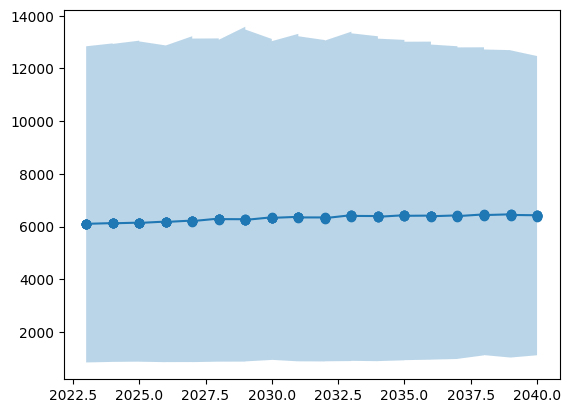

In [12]:
plt.plot(daly_sum['year'], daly_sum['mean'], marker = 'o')
plt.fill_between(daly_sum['year'], daly_sum['2.5%'], daly_sum['97.5%'], alpha = 0.3)

### All Cause Mortality Graphs

In [13]:
result_summary = (deaths
                      .groupby(['age', 'sex', 'year','scenario'])
                      .value.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,3.9625,0.0,19.025
1,25_to_29,female,2024,baseline,4.0375,0.0,18.050
2,25_to_29,female,2025,baseline,3.5125,0.0,15.025
3,25_to_29,female,2026,baseline,3.6000,0.0,16.025
4,25_to_29,female,2027,baseline,3.9875,0.0,16.025


In [14]:
%%capture 
from matplotlib.backends.backend_pdf import PdfPages # PDF package

with PdfPages('model13vv_raw_mortality_counts.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure()             
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year)]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
            plt.title(f'Raw death counts: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=1000)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### All Cause Mortality Graph with Rate

In [14]:
person_time = person_time.rename(columns = {'value':'ptvalue'})
per_time_group = person_time.groupby(['age', 'sex', 'year', 'input_draw','scenario']).ptvalue.sum().reset_index()

per_time_group.head()

,age,sex,year,input_draw,scenario,ptvalue
0,25_to_29,female,2023,29,baseline,25219.854894
1,25_to_29,female,2023,232,baseline,25233.577002
2,25_to_29,female,2023,357,baseline,25047.063655
3,25_to_29,female,2023,394,baseline,26883.986311
4,25_to_29,female,2023,602,baseline,26553.505818


In [15]:
results_rate = deaths.groupby(['age', 'sex', 'year', 'input_draw','scenario']).value.sum().reset_index()
results_rate = pd.concat([results_rate, per_time_group.ptvalue], axis=1)
results_rate['mean_rate'] = results_rate['value'] / results_rate['ptvalue']
result_summary = (results_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001250,0.000779,0.002053
1,25_to_29,female,2024,baseline,0.001286,0.000733,0.002332
2,25_to_29,female,2025,baseline,0.001131,0.000642,0.001861
3,25_to_29,female,2026,baseline,0.001166,0.000453,0.002089
4,25_to_29,female,2027,baseline,0.001296,0.000738,0.001911


In [17]:
%%capture 
with PdfPages('model13_acmr.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for year in result_summary.year.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.year==year) & (result_summary.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.title(f'All Cause Mortality Rate: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.4)
            plt.grid()
            plt.xlabel('Age')
            plt.ylabel('Deaths per Person/Year')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            pdf.savefig(bbox_inches='tight')

In [18]:
%%capture
## Has age and year reversed, so looking at year trend by age group now. 
with PdfPages('model13_acmr_byyear.pdf') as pdf:
    for sex in result_summary.sex.unique():
        for age in result_summary.age.unique():
            plt.figure() 
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            subdata = result_summary.loc[(result_summary.sex==sex) & (result_summary.age==age) & (result_summary.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.fill_between(subdata['year'], subdata['2.5%'], subdata['97.5%'], alpha =0.3)
            plt.title(f'ACMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.1)
            plt.grid()
            plt.xlabel('Years')
            plt.ylabel('Deaths per Person/Year')
            plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
            pdf.savefig(bbox_inches='tight')

In [16]:
result_summary_allage = (results_rate
                      .groupby(['sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allage.head()

,sex,year,scenario,mean,2.5%,97.5%
0,female,2023,baseline,0.049967,0.000990,0.288012
1,female,2024,baseline,0.050210,0.000955,0.292794
2,female,2025,baseline,0.049810,0.001083,0.298805
3,female,2026,baseline,0.049799,0.000987,0.282805
4,female,2027,baseline,0.049614,0.001003,0.293419


In [20]:
%%capture
with PdfPages('model13_acmr_allages.pdf') as pdf:
    for sex in result_summary_allage.sex.unique():
        plt.figure() 
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allage.loc[(result_summary_allage.sex==sex) & (result_summary_allage.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.title(f'ACMR: {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.1)
        plt.grid()
        plt.xlabel('Years')
        plt.ylabel('Deaths per Person/Year')
        plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
        pdf.savefig(bbox_inches='tight')

In [17]:
result_summary_allsex = (results_rate
                      .groupby(['age', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allsex.head()

,age,year,scenario,mean,2.5%,97.5%
0,25_to_29,2023,baseline,0.001832,0.000804,0.003101
1,25_to_29,2024,baseline,0.001860,0.000745,0.003261
2,25_to_29,2025,baseline,0.001683,0.000643,0.003204
3,25_to_29,2026,baseline,0.001807,0.000502,0.003384
4,25_to_29,2027,baseline,0.001964,0.000749,0.003597


In [22]:
%%capture
with PdfPages('model13_acmr_allsex.pdf') as pdf:
    for age in result_summary_allsex.age.unique():
        plt.figure() 
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = result_summary_allsex.loc[(result_summary_allsex.age==age) & (result_summary_allsex.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.title(f'ACMR: {age}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.1)
        plt.grid()
        plt.xlabel('Years')
        plt.ylabel('Deaths per Person/Year')
        plt.legend(['Baseline','Baseline 95%','Lifestyle','Lifestyle 95%','Outreach','Outreach 95%','Polypill','Polypill 95%'])
        pdf.savefig(bbox_inches='tight')

### Cause Specific Mortality Graphs
#### Acute Stroke

In [18]:
deaths_cause = (deaths
               .groupby(['age', 'sex', 'year', 'cause','scenario'])
               .value.describe(percentiles=[.025, .975])
               .filter(['mean', '2.5%', '97.5%'])
               .reset_index())

acute = deaths_cause.loc[(deaths_cause['cause'] == 'acute_ischemic_stroke')].reset_index()

acute.head()

,index,age,sex,year,cause,scenario,mean,2.5%,97.5%
0,0,25_to_29,female,2023,acute_ischemic_stroke,baseline,0.3,0.0,1.775
1,8,25_to_29,female,2024,acute_ischemic_stroke,baseline,0.3,0.0,1.775
2,16,25_to_29,female,2025,acute_ischemic_stroke,baseline,0.5,0.0,2.550
3,24,25_to_29,female,2026,acute_ischemic_stroke,baseline,0.4,0.0,1.775
4,32,25_to_29,female,2027,acute_ischemic_stroke,baseline,0.2,0.0,1.000


In [19]:
death_rate_cause = deaths.groupby(['age', 'sex', 'year', 'input_draw', 'cause','scenario']).value.sum().reset_index()
acute_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_ischemic_stroke')].reset_index()
acute_rate.head()

,index,age,sex,year,input_draw,cause,scenario,value
0,0,25_to_29,female,2023,29,acute_ischemic_stroke,baseline,2
1,8,25_to_29,female,2023,232,acute_ischemic_stroke,baseline,0
2,16,25_to_29,female,2023,357,acute_ischemic_stroke,baseline,0
3,24,25_to_29,female,2023,394,acute_ischemic_stroke,baseline,0
4,32,25_to_29,female,2023,602,acute_ischemic_stroke,baseline,1


In [20]:
acute_rate_2 = pd.concat([acute_rate, per_time_group.ptvalue], axis=1)
acute_rate_2['mean_rate'] = acute_rate_2['value'] / acute_rate_2['ptvalue']

acute_rate_summary = (acute_rate_2
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_rate_summary.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000012,0.0,0.000070
1,25_to_29,female,2024,baseline,0.000012,0.0,0.000071
2,25_to_29,female,2025,baseline,0.000020,0.0,0.000104
3,25_to_29,female,2026,baseline,0.000016,0.0,0.000073
4,25_to_29,female,2027,baseline,0.000008,0.0,0.000039


In [26]:
%%capture 
with PdfPages('model13_acute_csmr.pdf') as pdf:
    for sex in acute_rate_summary.sex.unique():
        for year in acute_rate_summary.year.unique():
            plt.figure() 
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_rate_summary.loc[(acute_rate_summary.sex==sex) & (acute_rate_summary.year==year) & (acute_rate_summary.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.title(f'Acute Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.01)
            plt.grid()
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            pdf.savefig(bbox_inches='tight')

#### Chronic Stroke

In [21]:
chronic_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate = pd.concat([chronic_rate, per_time_group.ptvalue], axis=1)
chronic_rate['mean_rate'] = chronic_rate['value'] / chronic_rate['ptvalue']
chronic_rate_summ = (chronic_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_summ

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000000,0.000000,0.000000
1,25_to_29,female,2024,baseline,0.000000,0.000000,0.000000
2,25_to_29,female,2025,baseline,0.000000,0.000000,0.000000
3,25_to_29,female,2026,baseline,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
536,95_plus,male,2037,baseline,0.007869,0.001972,0.014637
537,95_plus,male,2038,baseline,0.008324,0.005755,0.012795
538,95_plus,male,2039,baseline,0.006673,0.000706,0.011299
539,95_plus,male,2040,baseline,0.006720,0.003975,0.010219


In [28]:
%%capture
with PdfPages('model13_chronic_csmr.pdf') as pdf:
    for sex in chronic_rate_summ.sex.unique():
        for year in chronic_rate_summ.year.unique():
            plt.figure() 
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = chronic_rate_summ.loc[(chronic_rate_summ.sex==sex) & (chronic_rate_summ.year==year) & (chronic_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Chronic Stroke CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### CSMR for All Stroke

In [22]:
stroke_rate = death_rate_cause.loc[(death_rate_cause['cause'].isin(['chronic_ischemic_stroke','acute_ischemic_stroke']))].reset_index()
stroke_rate = stroke_rate.groupby(['age', 'sex', 'year','scenario','input_draw']).value.sum().reset_index()
stroke_rate = stroke_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
stroke_rate['mean_rate'] = stroke_rate['value'] / stroke_rate['ptvalue']
stroke_rate_summ = (stroke_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

stroke_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000012,0.0,0.000070
1,25_to_29,female,2024,baseline,0.000012,0.0,0.000071
2,25_to_29,female,2025,baseline,0.000020,0.0,0.000104
3,25_to_29,female,2026,baseline,0.000016,0.0,0.000073
4,25_to_29,female,2027,baseline,0.000008,0.0,0.000039


In [30]:
%%capture
with PdfPages('model13_stroke_csmr.pdf') as pdf:
    for sex in stroke_rate_summ.sex.unique():
        for age in stroke_rate_summ.age.unique():
            plt.figure() 
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_rate_summ.loc[(stroke_rate_summ.sex==sex) & (stroke_rate_summ.age==age) & (stroke_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Stroke CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### CSMR for All IHD 

In [23]:
IHD_rate = death_rate_cause.loc[(death_rate_cause['cause'].isin(['acute_myocardial_infarction','acute_myocardial_infarction_and_heart_failure','heart_failure_from_ischemic_heart_disease','heart_failure_residual','post_myocardial_infarction']))].reset_index()
IHD_rate = IHD_rate.groupby(['age', 'sex', 'year','scenario','input_draw']).value.sum().reset_index()
IHD_rate = IHD_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
IHD_rate['mean_rate'] = IHD_rate['value'] / IHD_rate['ptvalue']
IHD_rate_summ = (IHD_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

IHD_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000840,0.000363,0.001679
1,25_to_29,female,2024,baseline,0.000905,0.000523,0.001856
2,25_to_29,female,2025,baseline,0.000741,0.000385,0.001277
3,25_to_29,female,2026,baseline,0.000741,0.000296,0.001466
4,25_to_29,female,2027,baseline,0.000812,0.000383,0.001260


In [32]:
%%capture
with PdfPages('model13_IHD_csmr.pdf') as pdf:
    for sex in IHD_rate_summ.sex.unique():
        for age in IHD_rate_summ.age.unique():
            plt.figure() 
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_rate_summ.loc[(IHD_rate_summ.sex==sex) & (IHD_rate_summ.age==age) & (IHD_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'IHD CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Acute Myocardial Infarction - includes both heart failure and no heart failure

In [24]:
death_rate_cause.cause.unique()

array(['acute_ischemic_stroke', 'acute_myocardial_infarction',
       'acute_myocardial_infarction_and_heart_failure',
       'chronic_ischemic_stroke',
       'heart_failure_from_ischemic_heart_disease',
       'heart_failure_residual', 'other_causes',
       'post_myocardial_infarction'], dtype=object)

In [25]:
acute_MI_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction') | (death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure')].reset_index()
acute_MI_rate = acute_MI_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw', 'scenario'])
acute_MI_rate['mean_rate'] = acute_MI_rate['value'] / acute_MI_rate['ptvalue']
acute_MI_rate_summ = (acute_MI_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

acute_MI_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000144,0.0,0.000797
1,25_to_29,female,2024,baseline,0.000118,0.0,0.000642
2,25_to_29,female,2025,baseline,0.000111,0.0,0.000533
3,25_to_29,female,2026,baseline,0.000083,0.0,0.000412
4,25_to_29,female,2027,baseline,0.000124,0.0,0.000555


In [35]:
%%capture
with PdfPages('model13_acute_MI_csmr.pdf') as pdf:
    for sex in acute_MI_rate_summ.sex.unique():
        for year in acute_MI_rate_summ.year.unique():
            plt.figure() 
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.year==year) & (acute_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.03)
            plt.xlabel('Age')
            plt.ylabel('Deaths per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [36]:
%%capture
with PdfPages('model13_acute_MI_csmr_byyear.pdf') as pdf:
    for sex in acute_MI_rate_summ.sex.unique():
        for age in acute_MI_rate_summ.age.unique():
            plt.figure() 
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = acute_MI_rate_summ.loc[(acute_MI_rate_summ.sex==sex) & (acute_MI_rate_summ.age==age) & (acute_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Post Myocaridal Infarction

In [26]:
post_MI_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
post_MI_rate = pd.concat([post_MI_rate, per_time_group.ptvalue], axis=1)
post_MI_rate['mean_rate'] = post_MI_rate['value'] / post_MI_rate['ptvalue']
post_MI_rate_summ = (post_MI_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

post_MI_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000122,0.000009,0.000257
1,25_to_29,female,2024,baseline,0.000169,0.000000,0.000434
2,25_to_29,female,2025,baseline,0.000105,0.000000,0.000267
3,25_to_29,female,2026,baseline,0.000166,0.000000,0.000400
4,25_to_29,female,2027,baseline,0.000118,0.000000,0.000279


In [38]:
%%capture
with PdfPages('model13_post_MI_csmr.pdf') as pdf:
    for sex in post_MI_rate_summ.sex.unique():
        for year in post_MI_rate_summ.year.unique():
            plt.figure() 
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.year==year) & (post_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.ylim(ymax=0.01)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [39]:
%%capture
with PdfPages('model13_post_MI_csmr_byyear.pdf') as pdf:
    for sex in post_MI_rate_summ.sex.unique():
        for age in post_MI_rate_summ.age.unique():
            plt.figure() 
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = post_MI_rate_summ.loc[(post_MI_rate_summ.sex==sex) & (post_MI_rate_summ.age==age) & (post_MI_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI CSMR by Year: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [40]:
## Older age groups having an increased CSMR over time. This is probably related to the other issue we 
## have seen with post MI. 

#### Heart Failure

In [27]:
HF_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual')].reset_index()
HF_rate = HF_rate.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
HF_rate['mean_rate'] = HF_rate['value'] / HF_rate['ptvalue']
HF_rate_summ = (HF_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

HF_rate_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000215,0.0,0.000662
1,25_to_29,female,2024,baseline,0.000251,0.0,0.000767
2,25_to_29,female,2025,baseline,0.000207,0.0,0.000675
3,25_to_29,female,2026,baseline,0.000205,0.0,0.000850
4,25_to_29,female,2027,baseline,0.000223,0.0,0.000644


In [42]:
%%capture
with PdfPages('model13_HF_csmr.pdf') as pdf:
    for sex in HF_rate_summ.sex.unique():
        for year in HF_rate_summ.year.unique():
            plt.figure() 
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.year==year) & (HF_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF CSMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [43]:
%%capture
with PdfPages('model13_HF_csmr_byyear.pdf') as pdf:
    for sex in HF_rate_summ.sex.unique():
        for age in HF_rate_summ.age.unique():
            plt.figure() 
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = HF_rate_summ.loc[(HF_rate_summ.sex==sex) & (HF_rate_summ.age==age) & (HF_rate_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF CSMR: {age} {sex}') 
            plt.xticks(rotation=90) 
            #plt.ylim(ymax=0.03)
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Excess Mortality rate

#### Post Myocardial Infarction

In [28]:
state_person_time['state'].unique()

array(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure',
       'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease',
       'ischemic_heart_disease_and_heart_failure_heart_failure_residual',
       'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction',
       'ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure',
       'ischemic_stroke_acute_ischemic_stroke',
       'ischemic_stroke_chronic_ischemic_stroke',
       'ischemic_stroke_susceptible_to_ischemic_stroke'], dtype=object)

In [29]:
per_time_state = state_person_time.groupby(['age', 'sex', 'year', 'state', 'input_draw','scenario']).value.sum().reset_index()
per_time_state = per_time_state.rename(columns = {'value':'ptvalue'})
per_time_post_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction')].reset_index()

post_MI_emr = death_rate_cause.loc[(death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
post_MI_emr = pd.concat([post_MI_emr, per_time_post_MI.ptvalue], axis=1)
post_MI_emr['mean_rate'] = post_MI_emr['value'] / post_MI_emr['ptvalue']
post_MI_emr_summ = (post_MI_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

post_MI_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.048943,0.006566,0.087464
1,25_to_29,female,2024,baseline,0.063521,0.000000,0.174410
2,25_to_29,female,2025,baseline,0.031038,0.000000,0.052406
3,25_to_29,female,2026,baseline,0.043960,0.000000,0.080944
4,25_to_29,female,2027,baseline,0.033175,0.000000,0.084663


In [46]:
%%capture
with PdfPages('model13_post_MI_emr.pdf') as pdf:
    for sex in post_MI_emr_summ.sex.unique():
        for year in post_MI_emr_summ.year.unique():
            plt.figure() 
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = post_MI_emr_summ.loc[(post_MI_emr_summ.sex==sex) & (post_MI_emr_summ.year==year) & (post_MI_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI EMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Heart Failure EMR

In [30]:
per_time_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | (per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
HF_emr = death_rate_cause.loc[(death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual')].reset_index()
HF_emr = HF_emr.merge(per_time_HF[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
HF_emr['mean_rate'] = HF_emr['value'] / HF_emr['ptvalue']
HF_emr_summ = (HF_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

HF_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.702531,0.0,5.802148
1,25_to_29,female,2024,baseline,0.774422,0.0,4.318986
2,25_to_29,female,2025,baseline,0.554004,0.0,2.414173
3,25_to_29,female,2026,baseline,0.515155,0.0,2.800871
4,25_to_29,female,2027,baseline,0.546939,0.0,2.877283


In [48]:
%%capture
with PdfPages('model13_HF_emr.pdf') as pdf:
    for sex in HF_emr_summ.sex.unique():
        for year in HF_emr_summ.year.unique():
            plt.figure() 
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = HF_emr_summ.loc[(HF_emr_summ.sex==sex) & (HF_emr_summ.year==year) & (HF_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF EMR: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

##### Looks weird check with artifact values

### All IHD EMR

In [31]:
per_time_IHD = per_time_state.loc[(per_time_state['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction"]))].reset_index()
per_time_IHD = per_time_IHD.groupby(['age','sex','year','input_draw','scenario']).ptvalue.sum().reset_index()
IHD_emr = death_rate_cause.loc[(death_rate_cause['cause'].isin(['heart_failure_from_ischemic_heart_disease','heart_failure_residual','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','acute_myocardial_infarction_and_heart_failure','acute_myocardial_infarction']))].reset_index()
IHD_emr = IHD_emr.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
IHD_emr = IHD_emr.merge(per_time_IHD[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
IHD_emr['mean_rate'] = IHD_emr['value'] / IHD_emr['ptvalue']
IHD_emr_summ = (IHD_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

IHD_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.126475,0.074430,0.174286
1,25_to_29,female,2024,baseline,0.132690,0.046865,0.194739
2,25_to_29,female,2025,baseline,0.111672,0.072867,0.149241
3,25_to_29,female,2026,baseline,0.099524,0.048105,0.157521
4,25_to_29,female,2027,baseline,0.122367,0.095421,0.158921


In [50]:
%%capture
with PdfPages('model13_IHD_emr.pdf') as pdf:
    for sex in IHD_emr_summ.sex.unique():
        for age in IHD_emr_summ.age.unique():
            plt.figure() 
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = IHD_emr_summ.loc[(IHD_emr_summ.sex==sex) & (IHD_emr_summ.age==age) & (IHD_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'IHD EMR: {age} {sex}') 
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### All Stroke EMR

In [32]:
per_time_stroke = per_time_state.loc[(per_time_state['state'].isin(["ischemic_stroke_acute_ischemic_stroke", "ischemic_stroke_chronic_ischemic_stroke"]))].reset_index()
per_time_stroke = per_time_stroke.groupby(['age','sex','year','input_draw','scenario']).ptvalue.sum().reset_index()
stroke_emr = death_rate_cause.loc[(death_rate_cause['cause'].isin(['acute_ischemic_stroke','chronic_ischemic_stroke']))].reset_index()
stroke_emr = stroke_emr.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
stroke_emr = stroke_emr.merge(per_time_stroke[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
stroke_emr['mean_rate'] = stroke_emr['value'] / stroke_emr['ptvalue']
stroke_emr_summ = (stroke_emr
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

stroke_emr_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001219,0.0,0.006549
1,25_to_29,female,2024,baseline,0.001731,0.0,0.010660
2,25_to_29,female,2025,baseline,0.002252,0.0,0.008877
3,25_to_29,female,2026,baseline,0.001765,0.0,0.006126
4,25_to_29,female,2027,baseline,0.001014,0.0,0.005344


In [52]:
%%capture
with PdfPages('model13_stroke_emr.pdf') as pdf:
    for sex in stroke_emr_summ.sex.unique():
        for age in stroke_emr_summ.age.unique():
            plt.figure() 
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = stroke_emr_summ.loc[(stroke_emr_summ.sex==sex) & (stroke_emr_summ.age==age) & (stroke_emr_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Stroke EMR: {age} {sex}') 
            plt.xlabel('Year')
            plt.ylabel('Death per Person/Year')
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Prevalence 

#### Chronic + Acute Stroke

In [33]:
prev_acute = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_acute_ischemic_stroke')].reset_index()
prev_acute = prev_acute.rename(columns = {'ptvalue':'value'})
prev_acute_rate = pd.concat([prev_acute, per_time_group.ptvalue], axis=1)
prev_acute_rate['rate']= prev_acute_rate['value'] / prev_acute_rate['ptvalue']
prev_acute_rate_sum = (prev_acute_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

prev_acute_rate_sum.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000057,0.0,0.000254
1,25_to_29,female,2024,baseline,0.000040,0.0,0.000195
2,25_to_29,female,2025,baseline,0.000052,0.0,0.000229
3,25_to_29,female,2026,baseline,0.000062,0.0,0.000251
4,25_to_29,female,2027,baseline,0.000044,0.0,0.000201


In [54]:
%%capture
with PdfPages('model13_acute_stroke_prev.pdf') as pdf:
    for sex in prev_acute_rate_sum.sex.unique():
        for year in prev_acute_rate_sum.year.unique():
            plt.figure() 
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_rate_sum.loc[(prev_acute_rate_sum.sex==sex) & (prev_acute_rate_sum.year==year) & (prev_acute_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute Stroke Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [34]:
prev_chronic = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_chronic_ischemic_stroke')].reset_index()
prev_chronic = prev_chronic.rename(columns = {'ptvalue':'value'})
prev_chronic_rate = pd.concat([prev_chronic, per_time_group.ptvalue], axis=1)
prev_chronic_rate['rate']= prev_chronic_rate['value'] / prev_chronic_rate['ptvalue']
prev_chronic_rate_sum = (prev_chronic_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [56]:
%%capture
with PdfPages('model13_chronic_stroke_prev.pdf') as pdf:
    for sex in prev_chronic_rate_sum.sex.unique():
        for year in prev_chronic_rate_sum.year.unique():
            plt.figure() 
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_chronic_rate_sum.loc[(prev_chronic_rate_sum.sex==sex) & (prev_chronic_rate_sum.year==year) & (prev_chronic_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Chronic Stroke Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### Myocardial Infarction

In [35]:
prev_acute_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction'))].reset_index()
prev_acute_MI = prev_acute_MI.rename(columns = {'ptvalue':'value'})
prev_acute_MI = prev_acute_MI.groupby(['age','sex','year','input_draw','scenario']).value.sum().reset_index()
prev_acute_MI = prev_acute_MI.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_acute_MI['rate']= prev_acute_MI['value'] / prev_acute_MI['ptvalue']
prev_acute_MI_summ = (prev_acute_MI
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_acute_MI_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000098,0.000000e+00,0.000270
1,25_to_29,female,2024,baseline,0.000079,3.780371e-06,0.000195
2,25_to_29,female,2025,baseline,0.000076,7.017763e-07,0.000188
3,25_to_29,female,2026,baseline,0.000073,1.387634e-06,0.000181
4,25_to_29,female,2027,baseline,0.000077,1.399619e-06,0.000166


In [58]:
%%capture
with PdfPages('model13_acute_MI_prev.pdf') as pdf:
    for sex in prev_acute_MI_summ.sex.unique():
        for year in prev_acute_MI_summ.year.unique():
            plt.figure() 
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_acute_MI_summ.loc[(prev_acute_MI_summ.sex==sex) & (prev_acute_MI_summ.year==year) & (prev_acute_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [36]:
prev_post_MI = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_post_myocardial_infarction')].reset_index()
prev_post_MI = prev_post_MI.rename(columns = {'ptvalue':'value'})
prev_post_MI = pd.concat([prev_post_MI, per_time_group.ptvalue], axis=1)
prev_post_MI['rate']= prev_post_MI['value'] / prev_post_MI['ptvalue']
prev_post_MI_summ = (prev_post_MI
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_post_MI_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.002572,0.000907,0.005268
1,25_to_29,female,2024,baseline,0.002808,0.000717,0.005950
2,25_to_29,female,2025,baseline,0.002821,0.000554,0.005816
3,25_to_29,female,2026,baseline,0.002873,0.000397,0.005786
4,25_to_29,female,2027,baseline,0.002986,0.000297,0.005927


In [60]:
%%capture
with PdfPages('model13_post_MI_prev.pdf') as pdf:
    for sex in prev_post_MI_summ.sex.unique():
        for year in prev_post_MI_summ.year.unique():
            plt.figure() 
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='baseline')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.year==year) & (prev_post_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['age'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI Prevalence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

In [61]:
%%capture
with PdfPages('model13_post_MI_prev_byyear.pdf') as pdf:
    for sex in prev_post_MI_summ.sex.unique():
        for age in prev_post_MI_summ.age.unique():
            plt.figure() 
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = prev_post_MI_summ.loc[(prev_post_MI_summ.sex==sex) & (prev_post_MI_summ.age==age) & (prev_post_MI_summ.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Post MI Prevalence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            pdf.savefig(bbox_inches='tight')

#### This is still looking weird, previously noted 

In [37]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_post_hf = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_post_myocardial_infarction']))].reset_index()
tran_rate_post_to_hf = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_post_to_hf = tran_rate_post_to_hf.groupby(groupby_cols).sum() / per_time_sus_post_hf.groupby(groupby_cols).sum()
tran_rate_post_to_hf_summ = (tran_rate_post_to_hf.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_post_to_hf_summ.head()

mean  2.5%     97.5%
age      sex    year scenario                          
25_to_29 female 2023 baseline  0.000000   0.0  0.000000
                2024 baseline  0.000000   0.0  0.000000
                2025 baseline  0.000000   0.0  0.000000
                2026 baseline  0.001547   0.0  0.011992
                2027 baseline  0.000000   0.0  0.000000

In [63]:
%%capture
for sex in tran_rate_post_to_hf_summ.index.get_level_values('sex').unique():
    for age in tran_rate_post_to_hf_summ.index.get_level_values('age').unique():
        plt.figure() 
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='baseline')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='lifestyle_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='outreach_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        subdata = tran_rate_post_to_hf_summ.loc[(tran_rate_post_to_hf_summ.index.get_level_values('sex')==sex) & (tran_rate_post_to_hf_summ.index.get_level_values('age')==age) & (tran_rate_post_to_hf_summ.index.get_level_values('scenario')=='polypill_100')]
        plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'Post MI to HF Rate Incidence: {age} {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        #plt.ylim(0,0.04)

### Prevalence of Heart Failure

In [38]:
prev_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual'))].reset_index()
prev_HF = prev_HF.rename(columns = {'ptvalue':'value'})
prev_HF = prev_HF.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF['rate']= prev_HF['value'] / prev_HF['ptvalue']
prev_HF_summ = (prev_HF
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.001372,0.000091,0.003330
1,25_to_29,female,2024,baseline,0.001379,0.000130,0.003339
2,25_to_29,female,2025,baseline,0.001419,0.000132,0.003556
3,25_to_29,female,2026,baseline,0.001384,0.000141,0.003394
4,25_to_29,female,2027,baseline,0.001372,0.000129,0.003338


In [65]:
%%capture
for sex in prev_HF_summ.sex.unique():
    for age in prev_HF_summ.age.unique():
        plt.figure() 
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.age==age) & (prev_HF_summ.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Prevalence: {age} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

In [66]:
%%capture
for sex in prev_HF_summ.sex.unique():
    for year in prev_HF_summ.year.unique():
        plt.figure() 
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='baseline')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='outreach_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex) & (prev_HF_summ.year==year) & (prev_HF_summ.scenario=='polypill_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Prevalence: {year} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

#### There's some weird patterns but not consistent between age groups

### Incidence of First Time Acute Ischemic Stroke

In [39]:
tran_sum = (tran
                 .groupby(['age', 'sex', 'year', 'transition','scenario'])
                 .value.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_sum_stroke = tran_sum.loc[(tran_sum['transition'] == 'ischemic_stroke_susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_sum_stroke.head()

,index,age,sex,year,transition,scenario,mean,2.5%,97.5%
0,10,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,14.8,0.0,55.700
1,21,25_to_29,female,2024,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,9.4,0.0,37.375
2,32,25_to_29,female,2025,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,12.5,0.0,39.425
3,43,25_to_29,female,2026,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,15.9,0.0,49.400
4,54,25_to_29,female,2027,ischemic_stroke_susceptible_to_ischemic_stroke...,baseline,10.7,0.0,44.925


In [40]:
per_time_sus_stroke = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_susceptible_to_ischemic_stroke')].reset_index()
per_time_sus_stroke.head()

,index,age,sex,year,state,input_draw,scenario,ptvalue
0,80,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,29,baseline,24930.847365
1,81,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,232,baseline,25111.534565
2,82,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,357,baseline,24890.754278
3,83,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,394,baseline,26715.947981
4,84,25_to_29,female,2023,ischemic_stroke_susceptible_to_ischemic_stroke,602,baseline,26363.772758


In [41]:
tran_rate = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw','scenario']).value.sum().reset_index()
tran_rate = tran_rate.loc[(tran_rate['transition'] == 'ischemic_stroke_susceptible_to_ischemic_stroke_to_acute_ischemic_stroke')].reset_index()
tran_rate = pd.concat([tran_rate, per_time_group.ptvalue], axis=1)
tran_rate['rate']= tran_rate['value'] / tran_rate['ptvalue']
tran_rate_sum = (tran_rate
                 .groupby(['age', 'sex', 'year','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate_sum.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.000576,0.0,0.002193
1,25_to_29,female,2024,baseline,0.000372,0.0,0.001501
2,25_to_29,female,2025,baseline,0.000497,0.0,0.001590
3,25_to_29,female,2026,baseline,0.000637,0.0,0.002016
4,25_to_29,female,2027,baseline,0.000433,0.0,0.001853


In [70]:
%%capture
with PdfPages('model13_acute_stroke_inc.pdf') as pdf:
    for sex in tran_rate_sum.sex.unique():
        for age in tran_rate_sum.age.unique():
            plt.figure() 
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='baseline')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='lifestyle_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='outreach_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            subdata = tran_rate_sum.loc[(tran_rate_sum.sex==sex) & (tran_rate_sum.age==age) & (tran_rate_sum.scenario=='polypill_100')]
            plt.plot(subdata['year'], subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute Stroke Incidence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('Stroke Events per 100_000 Person Years')
            plt.grid()
            pdf.savefig(bbox_inches='tight')

### Incidence of First Time Acute MI for Greg 

In [42]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_MI = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_MI = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_MI_all = tran_rate_MI.groupby(groupby_cols).sum() / per_time_sus_MI.groupby(groupby_cols).sum()
tran_first_MI_summ = (tran_rate_MI_all.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_first_MI_summ.head()

mean      2.5%     97.5%
age      sex    year scenario                              
25_to_29 female 2023 baseline  0.001156  0.000000  0.003190
                2024 baseline  0.001008  0.000050  0.002566
                2025 baseline  0.000920  0.000009  0.002256
                2026 baseline  0.000928  0.000018  0.002182
                2027 baseline  0.000906  0.000018  0.002067

In [72]:
%%capture
with PdfPages('model13_first_time_acute_MI_inc.pdf') as pdf:
    for sex in tran_first_MI_summ.index.get_level_values('sex').unique():
        for age in tran_first_MI_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_first_MI_summ.loc[(tran_first_MI_summ.index.get_level_values('sex')==sex) & (tran_first_MI_summ.index.get_level_values('age')==age) & (tran_first_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'First Time Acute MI Incidence: {sex} {age}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### Incidence of Acute Myocardial Infraction 

In [43]:
state_person_time = pd.read_csv(sim_results_dir + '/state_person_time.csv')
person_time = state_person_time.loc[state_person_time['state'].isin(["ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure", "ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease", "ischemic_heart_disease_and_heart_failure_heart_failure_residual", "ischemic_heart_disease_and_heart_failure_post_myocardial_infarction", "ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure"])].reset_index() 
per_time_sus_MI = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease']))].reset_index()
tran_rate_MI = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_MI_all = tran_rate_MI.groupby(groupby_cols).sum() / per_time_sus_MI.groupby(groupby_cols).sum()
tran_MI_summ = (tran_rate_MI_all.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_MI_summ.head()

mean      2.5%     97.5%
age      sex    year scenario                              
25_to_29 female 2023 baseline  0.001263  0.000000  0.003389
                2024 baseline  0.001072  0.000049  0.002722
                2025 baseline  0.000988  0.000009  0.002397
                2026 baseline  0.000989  0.000018  0.002356
                2027 baseline  0.000967  0.000018  0.002239

In [74]:
%%capture
with PdfPages('model13_acute_MI_inc.pdf') as pdf:
    for sex in tran_MI_summ.index.get_level_values('sex').unique():
        for year in tran_MI_summ.index.get_level_values('year').unique():
            plt.figure() 
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('year')==year) & (tran_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Incidence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            plt.xlabel('Age')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

In [75]:
%%capture
with PdfPages('model13_acute_MI_inc_byyear.pdf') as pdf:
    for sex in tran_MI_summ.index.get_level_values('sex').unique():
        for age in tran_MI_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_MI_summ.loc[(tran_MI_summ.index.get_level_values('sex')==sex) & (tran_MI_summ.index.get_level_values('age')==age) & (tran_MI_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'Acute MI Incidence: {year} {age}') 
            plt.xticks(rotation=90) 
            plt.xlabel('Year')
            plt.ylabel('MI Events per 100_000 Person Years')
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### First Time Incidence of Heart Failure 

In [44]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_HF = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'year', 'input_draw','scenario']
tran_rate_HF = tran_rate_HF.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_summ = (tran_rate_HF.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_summ.head()

mean      2.5%     97.5%
age      sex    year scenario                              
25_to_29 female 2023 baseline  0.000758  0.000427  0.001039
                2024 baseline  0.000727  0.000372  0.001106
                2025 baseline  0.000786  0.000465  0.001385
                2026 baseline  0.000708  0.000496  0.001066
                2027 baseline  0.000693  0.000400  0.000938

In [77]:
%%capture
with PdfPages('model13_first_time_HF_inc.pdf') as pdf:
    for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
        for year in tran_rate_HF_summ.index.get_level_values('year').unique():
            plt.figure() 
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('year')==year) & (tran_rate_HF_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF Incidence: {year} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

In [78]:
%%capture
with PdfPages('model13_first_time_HF_inc_byyear.pdf') as pdf:
    for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
        for age in tran_rate_HF_summ.index.get_level_values('age').unique():
            plt.figure() 
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='baseline')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='lifestyle_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='outreach_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex) & (tran_rate_HF_summ.index.get_level_values('age')==age) & (tran_rate_HF_summ.index.get_level_values('scenario')=='polypill_100')]
            plt.plot(subdata.index.get_level_values('year'), subdata['mean'], marker='o')
            plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
            plt.title(f'HF Incidence: {age} {sex}') 
            plt.xticks(rotation=90) 
            plt.grid()
            #plt.ylim(0,0.04)
            pdf.savefig(bbox_inches='tight')

### Ratio in Prevalence of HF IHD to HF Resid 

In [45]:
prev_HF_IHD = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease')].reset_index()
prev_HF_resid = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
prev_HF_IHD = prev_HF_IHD.rename(columns = {'ptvalue':'value'})
prev_HF_resid = prev_HF_resid.rename(columns = {'ptvalue':'value'})
prev_HF_IHD = prev_HF_IHD.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_resid = prev_HF_resid.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_IHD['IHD_rate']= prev_HF_IHD['value'] / prev_HF_IHD['ptvalue']
prev_HF_resid['resid_rate']= prev_HF_resid['value'] / prev_HF_resid['ptvalue']
prev_HF_ratio = prev_HF_IHD.merge(prev_HF_resid[['age','sex','year','input_draw','scenario','resid_rate']], on=['age','sex','year','input_draw','scenario'])
prev_HF_ratio['IHD_ratio'] = prev_HF_ratio['IHD_rate']/ (prev_HF_ratio['IHD_rate'] + prev_HF_ratio['resid_rate'])
prev_HF_ratio_summ = (prev_HF_ratio
                 .groupby(['age', 'sex', 'year','scenario'])
                 .IHD_ratio.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_ratio_summ.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,0.076457,0.026078,0.117343
1,25_to_29,female,2024,baseline,0.075054,0.037027,0.120367
2,25_to_29,female,2025,baseline,0.075682,0.047342,0.132949
3,25_to_29,female,2026,baseline,0.079915,0.057265,0.134437
4,25_to_29,female,2027,baseline,0.092740,0.040212,0.147085


In [80]:
%%capture
for sex in prev_HF_ratio_summ.sex.unique():
    for age in prev_HF_ratio_summ.age.unique():
        plt.figure() 
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='baseline')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='outreach_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.age==age) & (prev_HF_ratio_summ.scenario=='polypill_100')]
        plt.plot(subdata['year'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Ratio the is IHD Prevalence: {age} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

In [81]:
%%capture
for sex in prev_HF_ratio_summ.sex.unique():
    for year in prev_HF_ratio_summ.year.unique():
        plt.figure() 
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='baseline')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='lifestyle_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='outreach_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        subdata = prev_HF_ratio_summ.loc[(prev_HF_ratio_summ.sex==sex) & (prev_HF_ratio_summ.year==year) & (prev_HF_ratio_summ.scenario=='polypill_100')]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.legend(['Baseline','Lifestyle','Outreach','Polypill'])
        plt.title(f'HF Ratio that is IHD Prevalence: {year} {sex}') 
        plt.xticks(rotation=90) 
        #plt.ylim(ymax=0.05)
        plt.grid()

### Artifacts

In [47]:
ls /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/

51-locations/  alabama_before_calculated_pafs.hdf  washington.hdf
alabama.hdf    raw_data/


In [48]:
from vivarium import Artifact

#explore the artifact data (note age groups)
art = Artifact('/mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf', filter_terms=['year_start == 2019', 'age_start >=  25'])

In [49]:
art_pop = art.load('population.structure').reset_index()
art_pop.head()

,location,sex,age_start,age_end,year_start,year_end,value
0,Alabama,Female,25.0,30.0,2019,2020,171101.787730
1,Alabama,Female,30.0,35.0,2019,2020,162707.127245
2,Alabama,Female,35.0,40.0,2019,2020,160738.561697
3,Alabama,Female,40.0,45.0,2019,2020,151811.937430
4,Alabama,Female,45.0,50.0,2019,2020,160780.871213


In [50]:
art.keys

['metadata.keyspace',
 'metadata.locations',
 'population.location',
 'population.structure',
 'population.age_bins',
 'population.demographic_dimensions',
 'population.theoretical_minimum_risk_life_expectancy',
 'cause.all_causes.cause_specific_mortality_rate',
 'sequela.acute_ischemic_stroke.prevalence',
 'sequela.chronic_ischemic_stroke.prevalence',
 'cause.ischemic_stroke.incidence_rate',
 'sequela.acute_ischemic_stroke.disability_weight',
 'sequela.chronic_ischemic_stroke.disability_weight',
 'sequela.acute_ischemic_stroke.excess_mortality_rate',
 'sequela.chronic_ischemic_stroke.excess_mortality_rate',
 'cause.ischemic_stroke.cause_specific_mortality_rate',
 'cause.ischemic_stroke.restrictions',
 'cause.acute_myocardial_infarction.prevalence',
 'cause.post_myocardial_infarction.prevalence',
 'cause.myocardial_infarction.incidence_rate',
 'cause.acute_myocardial_infarction.disability_weight',
 'cause.post_myocardial_infarction.disability_weight',
 'cause.acute_myocardial_infarctio

In [51]:
art_mort = art.load('sequela.acute_ischemic_stroke.excess_mortality_rate').reset_index()
art_mort.head()

,sex,age_start,age_end,year_start,year_end,draw_0,draw_1,draw_2,draw_3,draw_4,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,Female,25.0,30.0,2019,2020,0.31588,0.40003,0.32045,0.38893,0.24140,...,0.27915,0.29902,0.33340,0.28170,0.45043,0.26388,0.31837,0.28815,0.23798,0.20685
1,Female,30.0,35.0,2019,2020,0.30193,0.33175,0.28828,0.37140,0.24475,...,0.27680,0.29742,0.35445,0.23455,0.42553,0.22783,0.26775,0.28548,0.25033,0.25325
2,Female,35.0,40.0,2019,2020,0.28018,0.29485,0.27522,0.29580,0.32445,...,0.29240,0.29728,0.32355,0.24025,0.35158,0.27568,0.30525,0.40163,0.30818,0.44195
3,Female,40.0,45.0,2019,2020,0.24315,0.27495,0.29525,0.26428,0.35000,...,0.28105,0.31522,0.29495,0.24098,0.31315,0.28515,0.32320,0.41060,0.31078,0.45695
4,Female,45.0,50.0,2019,2020,0.19085,0.27205,0.34835,0.27682,0.32140,...,0.24275,0.35128,0.26865,0.23673,0.31025,0.25625,0.32160,0.31240,0.25812,0.29825


In [92]:
def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        #data = data[['draw_29','draw_232','draw_357','draw_394','draw_602','draw_629','draw_650','draw_680','draw_829','draw_949']]
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
        data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

#### All Cause Mortality Rates

In [93]:
art_acmr = load_artifact_data('cause', 'all_causes', 'cause_specific_mortality_rate')
art_acmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_acmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000950,0.000706,0.001237,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.001364,0.001029,0.001755,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.001697,0.001285,0.002179,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.002592,0.001978,0.003305,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.003660,0.002792,0.004668,Alabama,cause_specific_mortality_rate,45_to_49


In [94]:
result_summary_allyears = (results_rate.loc[results_rate.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

result_summary_allyears.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.001216,0.000574,0.002156
1,25_to_29,male,0.002426,0.001610,0.003709
2,30_to_34,female,0.001503,0.000934,0.002375
3,30_to_34,male,0.002597,0.001763,0.004053
4,35_to_39,female,0.001770,0.001230,0.002464


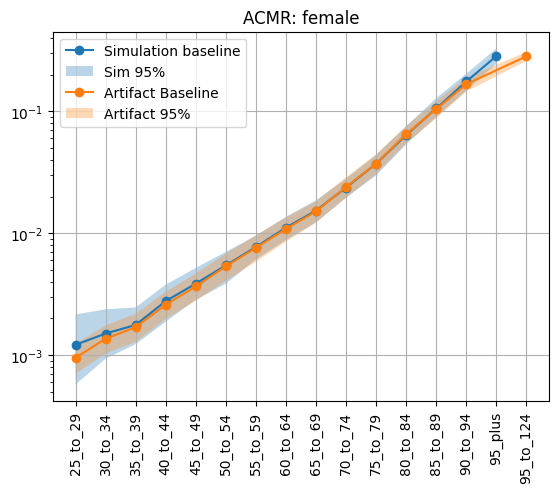

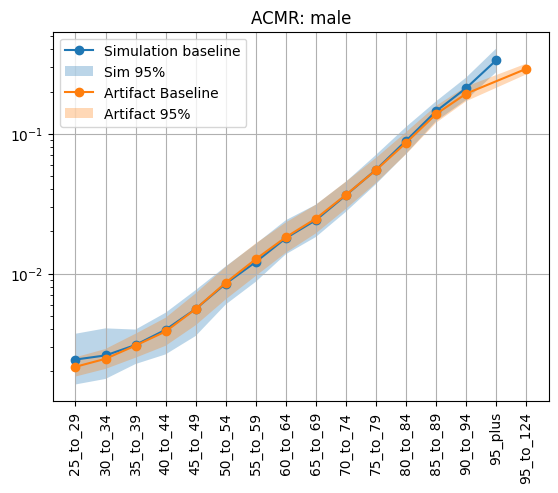

In [95]:
with PdfPages('model13_acmr_artifact_and_sim.pdf') as pdf:
    for sex in result_summary_allyears.sex.unique():
        plt.figure() 
        subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
        plt.plot(subdata['age'], subdata['mean'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_acmr.loc[(art_acmr.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'ACMR: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Cause Specific Mortality Rates

#### Stroke

In [96]:
art_csmr = load_artifact_data('cause', 'ischemic_stroke', 'cause_specific_mortality_rate') 
art_csmr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_acmr.age_start,art_acmr.age_end)]
art_csmr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000002,0.000001,0.000003,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000004,0.000002,0.000007,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000006,0.000003,0.000009,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000011,0.000007,0.000016,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000017,0.000011,0.000026,Alabama,cause_specific_mortality_rate,45_to_49


In [100]:
acute_rate_sum_allyear = (acute_rate_2.loc[acute_rate_2.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .acute_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

In [102]:
chronic_rate_allyear = (chronic_rate.loc[chronic_rate.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .chronic_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

In [103]:
acute_rate_2 = acute_rate_2.rename(columns = {'mean_rate':'acute_rate'})
chronic_rate = chronic_rate.rename(columns = {'mean_rate':'chronic_rate'})
total_stroke_rate = pd.concat([acute_rate_2, chronic_rate.chronic_rate], axis=1)
total_stroke_rate['total_rate'] = total_stroke_rate['acute_rate'] + total_stroke_rate['chronic_rate']

In [104]:
total_stroke_rate_allyear = (total_stroke_rate
                      .groupby(['age', 'sex'])
                      .total_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
total_stroke_rate_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000013,0.0,0.000082
1,25_to_29,male,0.000008,0.0,0.000061
2,30_to_34,female,0.000013,0.0,0.000126
3,30_to_34,male,0.000008,0.0,0.000083
4,35_to_39,female,0.000009,0.0,0.000081


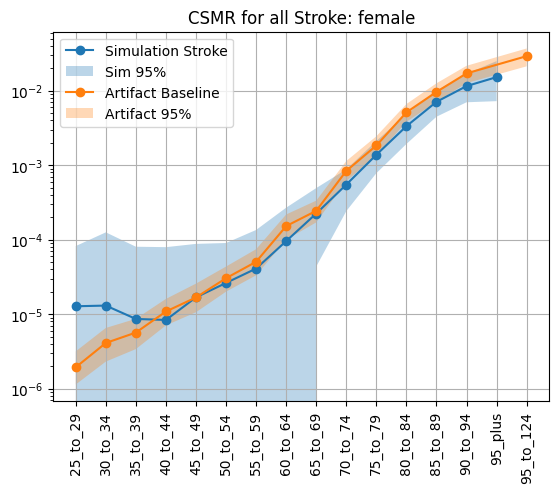

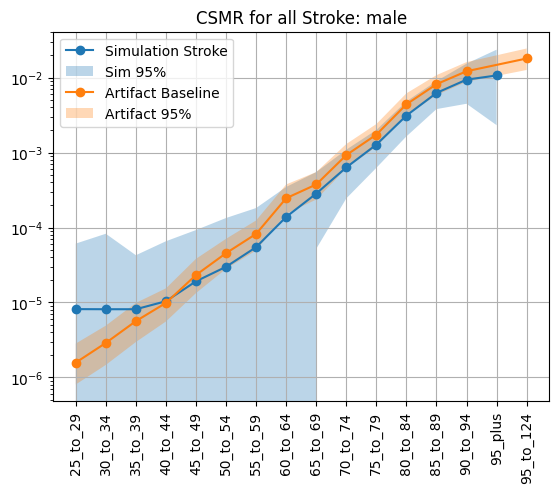

In [105]:
with PdfPages('model13_csmr_artifact_and_sim.pdf') as pdf:
    for sex in acute_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata4 = total_stroke_rate_allyear.loc[(total_stroke_rate_allyear.sex==sex)]
        plt.plot(subdata4['age'], subdata4['mean'], marker='o')
        plt.fill_between(subdata4['age'], subdata4['2.5%'], subdata4['97.5%'], alpha=.3)
        subdata3 = art_csmr.loc[(art_csmr.sex==sex)]
        plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
        plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
        plt.title(f'CSMR for all Stroke: {sex}') 
        plt.xticks(rotation=90) 
        plt.yscale('log')
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation Stroke', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 
        plt.show()

#### IHD and HF Combined

In [106]:
art_csmr2 = load_artifact_data('cause', 'ischemic_heart_disease_and_heart_failure', 'cause_specific_mortality_rate') 
art_csmr2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_csmr2.age_start,art_csmr2.age_end)]
art_csmr2.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000546,0.000412,0.000710,Alabama,cause_specific_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000652,0.000483,0.000838,Alabama,cause_specific_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000746,0.000545,0.000978,Alabama,cause_specific_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000804,0.000611,0.001051,Alabama,cause_specific_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.001383,0.001112,0.001699,Alabama,cause_specific_mortality_rate,45_to_49


In [107]:
IHD_HF_CSMR = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction') | (death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure') | (death_rate_cause['cause'] == 'heart_failure_from_ischemic_heart_disease') | (death_rate_cause['cause'] == 'heart_failure_residual') | (death_rate_cause['cause'] == 'post_myocardial_infarction')].reset_index()
IHD_HF_CSMR = IHD_HF_CSMR.groupby(['age','sex','year','input_draw']).value.sum().reset_index()
IHD_HF_CSMR = IHD_HF_CSMR.merge(per_time_group[['age','sex','year','input_draw','ptvalue']], on=['age','sex','year','input_draw'])
IHD_HF_CSMR['mean_rate'] = IHD_HF_CSMR['value'] / IHD_HF_CSMR['ptvalue']
IHD_HF_CSMR_allyear = (IHD_HF_CSMR
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
IHD_HF_CSMR_allyear

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000802,0.000301,0.001563
1,25_to_29,male,0.001084,0.000504,0.002080
2,30_to_34,female,0.000771,0.000345,0.001573
3,30_to_34,male,0.001127,0.000611,0.002513
...,...,...,...,...,...
26,90_to_94,female,0.109009,0.072391,0.147299
27,90_to_94,male,0.164498,0.128152,0.198194
28,95_plus,female,0.143238,0.105239,0.191012
29,95_plus,male,0.243195,0.176832,0.301177


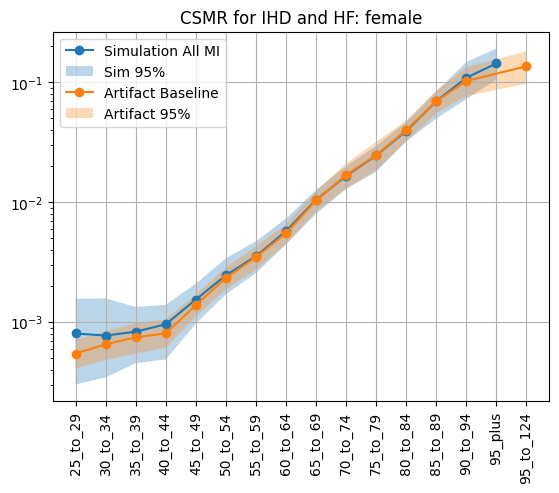

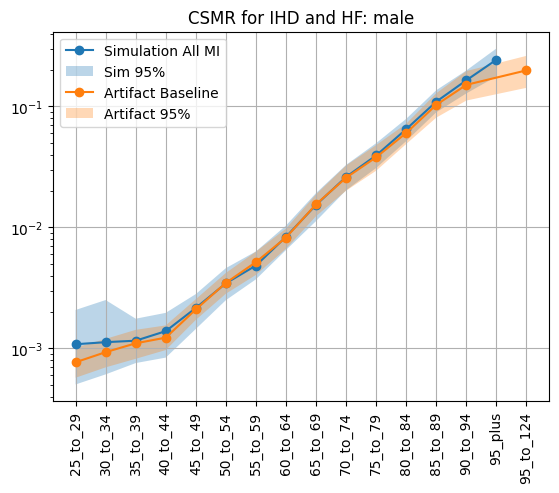

In [108]:
for sex in IHD_HF_CSMR_allyear.sex.unique():
    plt.figure() 
    subdata = IHD_HF_CSMR_allyear.loc[(IHD_HF_CSMR_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_csmr2.loc[(art_csmr2.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'CSMR for IHD and HF: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Incidence Rates for Stroke

In [109]:
art_inc = load_artifact_data('cause', 'ischemic_stroke', 'incidence_rate')
art_inc['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc.age_start,art_inc.age_end)]
art_inc.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000116,0.000050,0.000225,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000163,0.000091,0.000266,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000232,0.000128,0.000381,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000370,0.000242,0.000552,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000579,0.000343,0.000939,Alabama,incidence_rate,45_to_49


In [110]:
tran_rate_sum_allyear = (tran_rate.loc[tran_rate.scenario=='baseline']
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, 0.5, .975])
                 .filter(['50%', '2.5%', '97.5%'])
                 .reset_index())
tran_rate_sum_allyear.head()

,age,sex,year,50%,2.5%,97.5%
0,25_to_29,female,2023,0.000139,0.0,0.002193
1,25_to_29,female,2024,0.000141,0.0,0.001501
2,25_to_29,female,2025,0.000122,0.0,0.001590
3,25_to_29,female,2026,0.000205,0.0,0.002016
4,25_to_29,female,2027,0.000165,0.0,0.001853


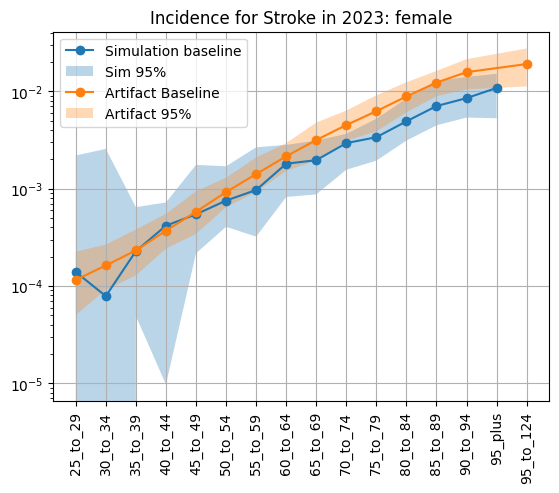

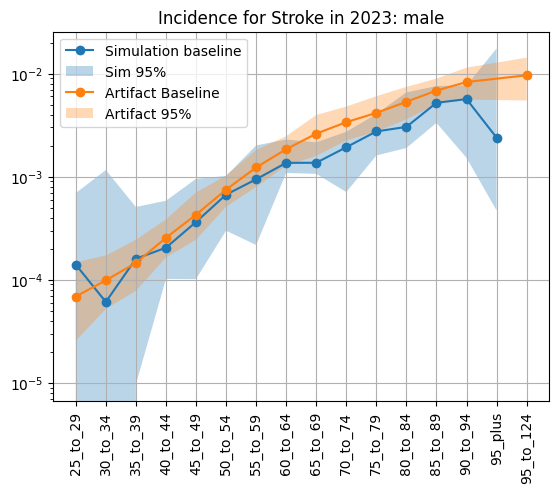

In [111]:
with PdfPages('model13_inc_artifact_and_sim.pdf') as pdf:
    for sex in tran_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2023)]
        plt.plot(subdata['age'], subdata['50%'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_inc.loc[(art_inc.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'Incidence for Stroke in 2023: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

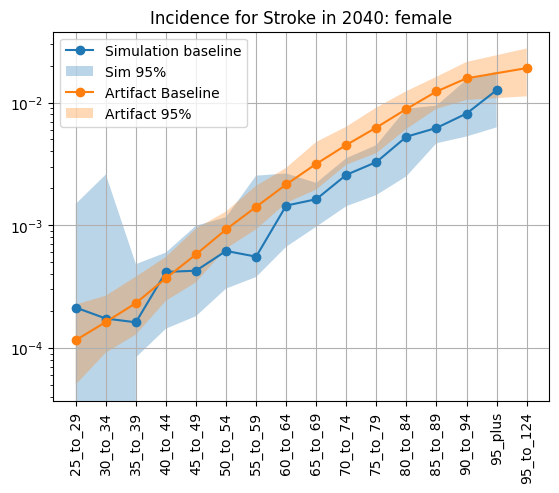

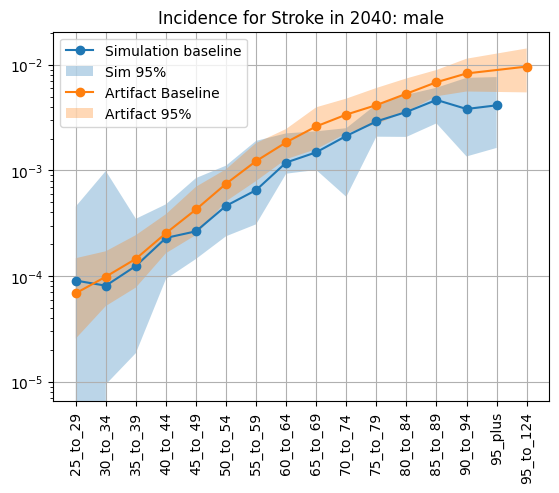

In [112]:
with PdfPages('model13_inc_artifact_and_sim.pdf') as pdf:
    for sex in tran_rate_sum_allyear.sex.unique():
        plt.figure() 
        subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2040)]
        plt.plot(subdata['age'], subdata['50%'], marker='o')
        plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
        subdata2 = art_inc.loc[(art_inc.sex==sex)]
        plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
        plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
        plt.title(f'Incidence for Stroke in 2040: {sex}') 
        plt.xticks(rotation=90) 
        plt.grid()
        plt.yscale('log')
        pdf.savefig(bbox_inches='tight')
        plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Incidence Rates for MI

In [113]:
art_inc_acute_MI = load_artifact_data('cause', 'acute_myocardial_infarction', 'incidence_rate')
art_inc_acute_MI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_acute_MI.age_start,art_inc_acute_MI.age_end)]
art_inc_acute_MI.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000453,0.000285,0.000617,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000512,0.000347,0.000685,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000428,0.000297,0.000583,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000541,0.000415,0.000692,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000853,0.000652,0.001114,Alabama,incidence_rate,45_to_49


In [114]:
groupby_cols2 = ['age', 'sex', 'input_draw']
tran_rate_MI_all = tran_rate_MI.loc[tran_rate_MI.scenario=='baseline'].groupby(groupby_cols2).sum() / per_time_sus_MI.loc[per_time_sus_MI.scenario=='baseline'].groupby(groupby_cols2).sum()
tran_MI_summ_allyear = (tran_rate_MI_all.groupby([c for c in groupby_cols2 if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.5, 0.975])
                   .filter(['mean','50%', '2.5%', '97.5%']))
                 
tran_MI_summ_allyear.head()

mean       50%      2.5%     97.5%
age      sex                                           
25_to_29 female  0.001082  0.000784  0.000036  0.002647
         male    0.001015  0.000513  0.000056  0.003037
30_to_34 female  0.000745  0.000496  0.000113  0.002235
         male    0.001223  0.000794  0.000150  0.004674
35_to_39 female  0.000484  0.000397  0.000323  0.000714

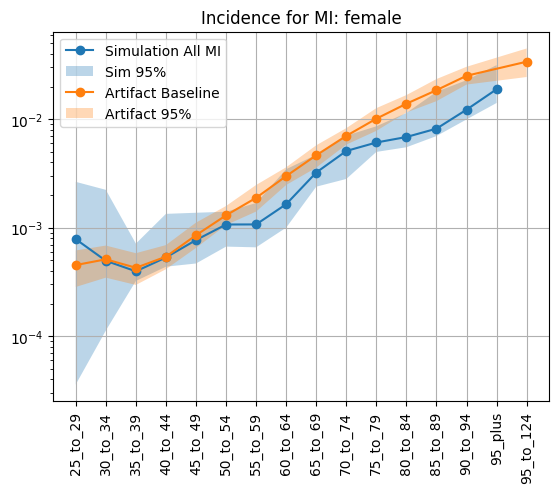

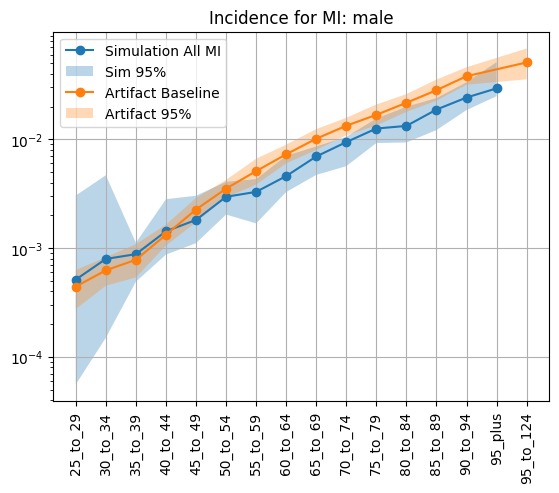

In [115]:
%matplotlib inline
for sex in tran_MI_summ_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_MI_summ_allyear.loc[(tran_MI_summ_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['50%'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_acute_MI.loc[(art_inc_acute_MI.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 
    plt.show()

### Incidence Rates for Heart Failure IHD

In [72]:
art_inc_HF_IHD = load_artifact_data('cause', 'heart_failure_from_ischemic_heart_disease', 'incidence_rate')
art_inc_HF_IHD['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_HF_IHD.age_start,art_inc_HF_IHD.age_end)]
art_inc_HF_IHD.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000057,0.000041,0.000075,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000081,0.000060,0.000104,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000089,0.000056,0.000130,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000185,0.000138,0.000239,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.000497,0.000408,0.000590,Alabama,incidence_rate,45_to_49


In [73]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure']))].reset_index()
tran_rate_HF_IHD = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw','scenario']
tran_rate_HF_IHD = tran_rate_HF_IHD.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_IHD_allyear = (tran_rate_HF_IHD.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_IHD_allyear = tran_rate_HF_IHD_allyear.loc[tran_rate_HF_IHD_allyear.index.get_level_values('scenario')=='baseline']
tran_rate_HF_IHD_allyear.head()

mean      2.5%     97.5%
age      sex    scenario                              
25_to_29 female baseline  0.000059  0.000038  0.000085
         male   baseline  0.000133  0.000109  0.000170
30_to_34 female baseline  0.000091  0.000065  0.000117
         male   baseline  0.000175  0.000132  0.000229
35_to_39 female baseline  0.000098  0.000061  0.000128

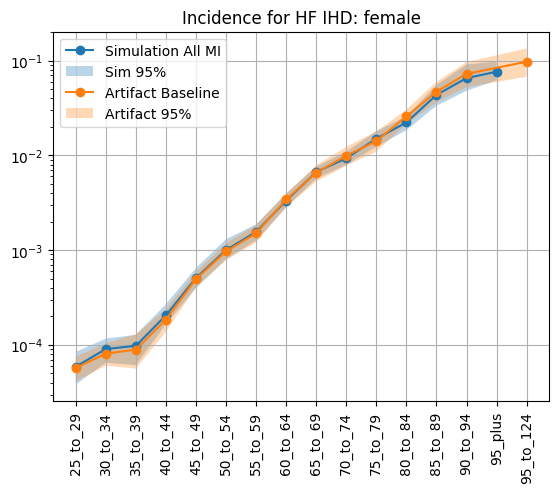

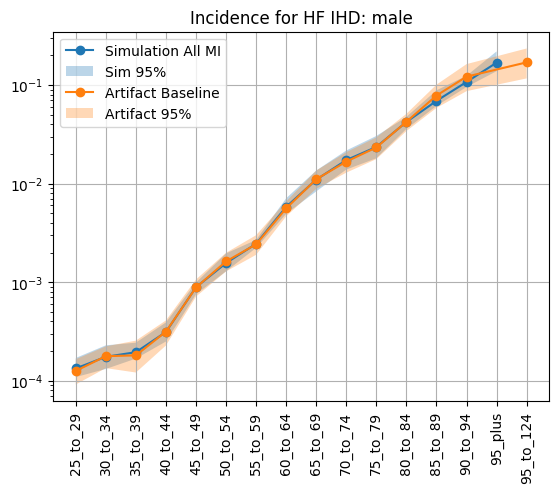

In [74]:
for sex in tran_rate_HF_IHD_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_IHD_allyear.loc[(tran_rate_HF_IHD_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_HF_IHD.loc[(art_inc_HF_IHD.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF IHD: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Incidence Rates for Heart Failure Residual

In [75]:
art_inc_HF_resid = load_artifact_data('cause', 'heart_failure_residual', 'incidence_rate')
art_inc_HF_resid['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_inc_HF_resid.age_start,art_inc_HF_resid.age_end)]
art_inc_HF_resid.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000601,0.000435,0.000792,Alabama,incidence_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.000568,0.000423,0.000728,Alabama,incidence_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.000395,0.000249,0.000574,Alabama,incidence_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.000683,0.000509,0.000880,Alabama,incidence_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.001313,0.001078,0.001558,Alabama,incidence_rate,45_to_49


In [76]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure']))].reset_index()
tran_rate_HF_resid = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw','scenario']
tran_rate_HF_resid = tran_rate_HF_resid.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_resid_allyear = (tran_rate_HF_resid.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_resid_allyear = tran_rate_HF_resid_allyear.loc[tran_rate_HF_resid_allyear.index.get_level_values('scenario')=='baseline']
tran_rate_HF_resid_allyear.head()

mean      2.5%     97.5%
age      sex    scenario                              
25_to_29 female baseline  0.000672  0.000409  0.000910
         male   baseline  0.000947  0.000719  0.001040
30_to_34 female baseline  0.000653  0.000455  0.000833
         male   baseline  0.000791  0.000632  0.000976
35_to_39 female baseline  0.000447  0.000379  0.000530

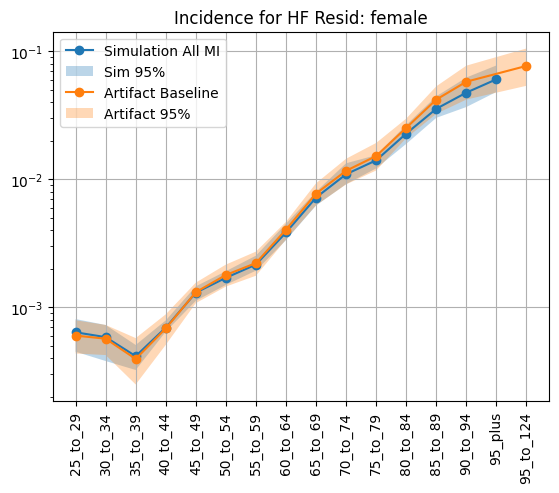

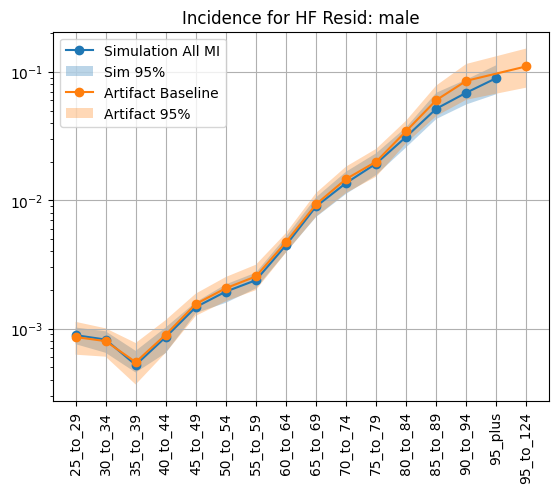

In [114]:
for sex in tran_rate_HF_resid_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_resid_allyear.loc[(tran_rate_HF_resid_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = art_inc_HF_resid.loc[(art_inc_HF_resid.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF Resid: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

Matches the artifact but the artifact looks weird for the youngest folks 

#### Prevalence Rates

In [77]:
prev_chronic_rate_sum_allyear = (prev_chronic_rate.loc[prev_chronic_rate.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [78]:
art_prev = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'prevalence')
art_prev['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev.age_start,art_prev.age_end)]
art_prev.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.004986,0.003708,0.006410,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.006119,0.004613,0.007857,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.007737,0.005971,0.010016,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.010115,0.007659,0.013100,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.014078,0.010695,0.018031,Alabama,prevalence,45_to_49


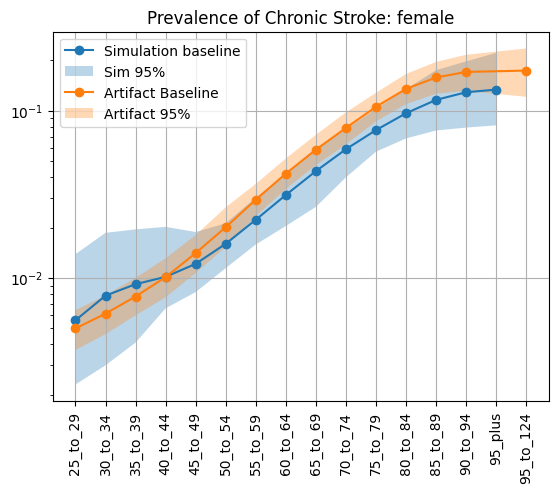

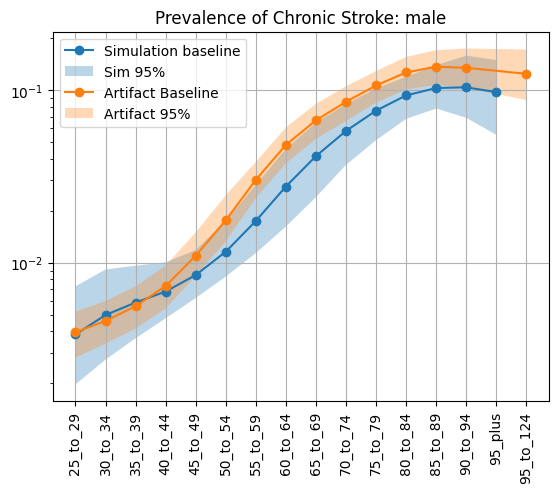

In [79]:
for sex in prev_chronic_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_chronic_rate_sum_allyear.loc[(prev_chronic_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev.loc[(art_prev.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [80]:
prev_acute_rate_sum_allyear = (prev_acute_rate.loc[prev_acute_rate.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

In [81]:
art_prev2 = load_artifact_data('sequela', 'acute_ischemic_stroke', 'prevalence')
art_prev2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev2.age_start,art_prev2.age_end)]

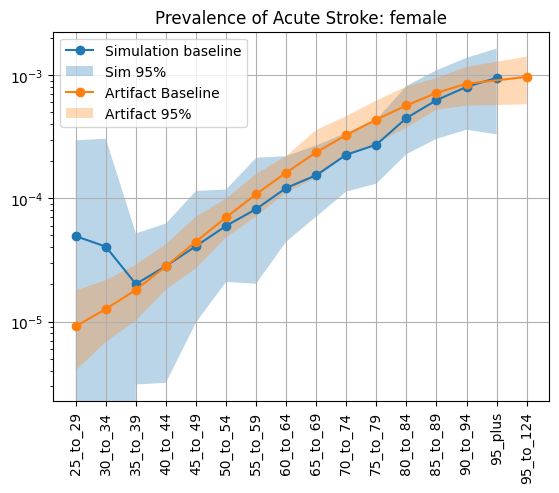

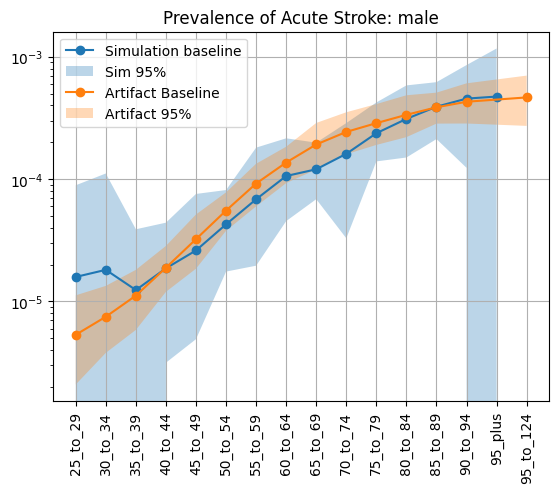

In [82]:
for sex in prev_acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_acute_rate_sum_allyear.loc[(prev_acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev2.loc[(art_prev2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Prevalence of Post MI

In [83]:
art_prev3 = load_artifact_data('cause', 'post_myocardial_infarction', 'prevalence')
art_prev3['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev3.age_start,art_prev3.age_end)]
art_prev3.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.001227,0.000904,0.001572,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.002535,0.001864,0.003276,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.004010,0.003123,0.005006,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.005656,0.004445,0.007094,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.007601,0.005987,0.009411,Alabama,prevalence,45_to_49


In [84]:
prev_post_MI_sum_allyear = (prev_post_MI.loc[prev_post_MI.scenario=='baseline']
                 .groupby(['age', 'sex', 'year'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_post_MI_sum_allyear.head()

,age,sex,year,mean,2.5%,97.5%
0,25_to_29,female,2023,0.002572,0.000907,0.005268
1,25_to_29,female,2024,0.002808,0.000717,0.005950
2,25_to_29,female,2025,0.002821,0.000554,0.005816
3,25_to_29,female,2026,0.002873,0.000397,0.005786
4,25_to_29,female,2027,0.002986,0.000297,0.005927


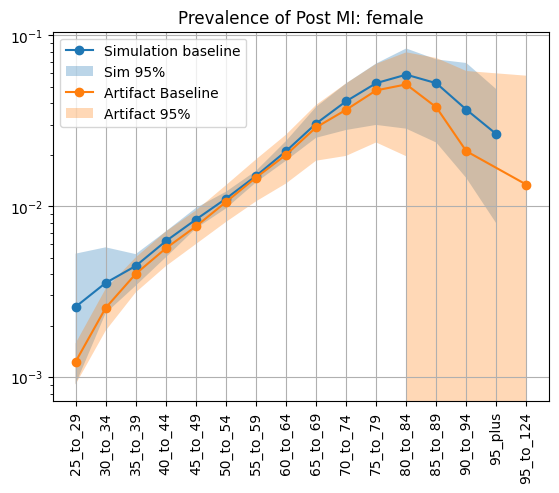

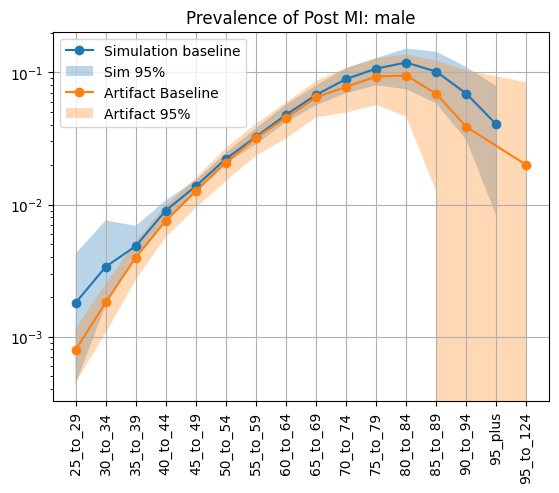

In [85]:
##Can try plotting the median 

for sex in prev_post_MI_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_post_MI_sum_allyear.loc[(prev_post_MI_sum_allyear.sex==sex) & (prev_post_MI_sum_allyear.year == 2023)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev3.loc[(art_prev3.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Post MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

In [124]:
## 2023 looks pretty good but 2040 looks pretty bad 

#### Prevalence of Acute MI

In [86]:
art_prev4 = load_artifact_data('cause', 'acute_myocardial_infarction', 'prevalence')
art_prev4['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev4.age_start,art_prev4.age_end)]
art_prev4.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000029,0.000019,0.000040,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.000036,0.000024,0.000048,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.000031,0.000021,0.000042,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.000037,0.000028,0.000048,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.000058,0.000044,0.000074,Alabama,prevalence,45_to_49


In [87]:
prev_acute_MI_sum_allyear = (prev_acute_MI.loc[prev_acute_MI.scenario=='baseline']
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_acute_MI_sum_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.000082,0.000000,0.000229
1,25_to_29,male,0.000077,0.000000,0.000264
2,30_to_34,female,0.000057,0.000003,0.000209
3,30_to_34,male,0.000093,0.000006,0.000437
4,35_to_39,female,0.000037,0.000013,0.000070


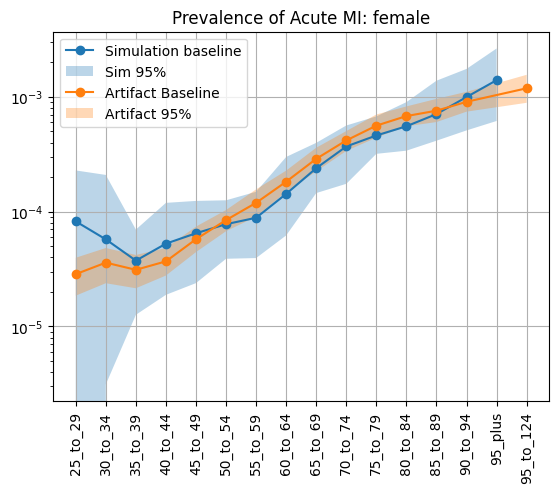

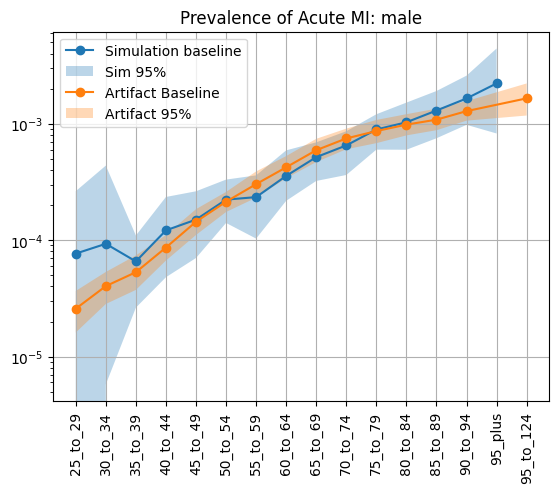

In [88]:
for sex in prev_acute_MI_sum_allyear.sex.unique():
    plt.figure() 
    subdata = prev_acute_MI_sum_allyear.loc[(prev_acute_MI_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev4.loc[(art_prev4.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of Acute MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### Prevalence of Heart Failure IHD

In [89]:
art_prev_hf_ihd = load_artifact_data('cause', 'heart_failure_from_ischemic_heart_disease', 'prevalence')
art_prev_hf_ihd['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev_hf_ihd.age_start,art_prev_hf_ihd.age_end)]
art_prev_hf_ihd.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.000224,0.000169,0.000288,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.000471,0.000345,0.000624,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.000680,0.000515,0.000866,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.000746,0.000582,0.000948,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.001574,0.001337,0.001821,Alabama,prevalence,45_to_49


In [90]:
prev_HF_IHD = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease')].reset_index()
prev_HF_IHD = prev_HF_IHD.rename(columns = {'ptvalue':'value'})
prev_HF_IHD = prev_HF_IHD.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_IHD['rate']= prev_HF_IHD['value'] / prev_HF_IHD['ptvalue']
prev_HF_IHD_allyear = (prev_HF_IHD
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_IHD_allyear = prev_HF_IHD_allyear.loc[prev_HF_IHD_allyear.scenario=='baseline']
prev_HF_IHD_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.000183,0.000029,0.000339
1,25_to_29,male,baseline,0.000372,0.000147,0.000611
2,30_to_34,female,baseline,0.000394,0.000191,0.000679
3,30_to_34,male,baseline,0.000715,0.000423,0.001090
4,35_to_39,female,baseline,0.000547,0.000263,0.000937


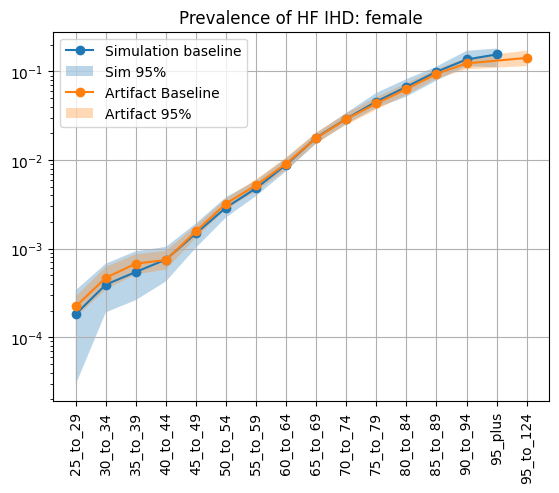

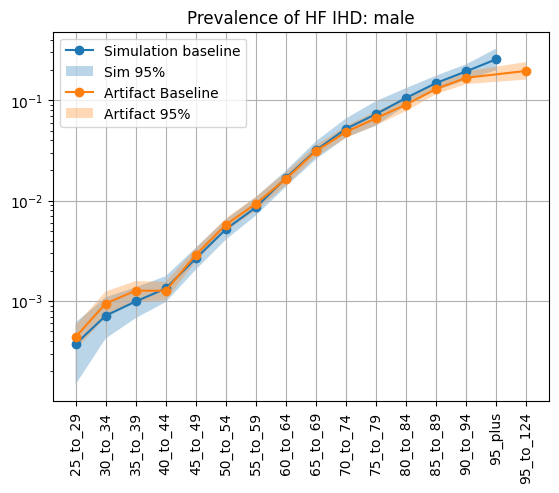

In [91]:
for sex in prev_HF_IHD_allyear.sex.unique():
    plt.figure() 
    subdata = prev_HF_IHD_allyear.loc[(prev_HF_IHD_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev_hf_ihd.loc[(art_prev_hf_ihd.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of HF IHD: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

## Prevalence of Heart Failure Residual

In [129]:
art_prev_hf_resid = load_artifact_data('cause', 'heart_failure_residual', 'prevalence')
art_prev_hf_resid['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_prev_hf_resid.age_start,art_prev_hf_resid.age_end)]
art_prev_hf_resid.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.002341,0.001774,0.003021,Alabama,prevalence,25_to_29
1,female,30.0,35.0,2019,2020,0.003290,0.002414,0.004362,Alabama,prevalence,30_to_34
2,female,35.0,40.0,2019,2020,0.002993,0.002267,0.003813,Alabama,prevalence,35_to_39
3,female,40.0,45.0,2019,2020,0.002735,0.002134,0.003475,Alabama,prevalence,40_to_44
4,female,45.0,50.0,2019,2020,0.004126,0.003504,0.004772,Alabama,prevalence,45_to_49


In [130]:
prev_HF_resid = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual')].reset_index()
prev_HF_resid = prev_HF_resid.rename(columns = {'ptvalue':'value'})
prev_HF_resid = prev_HF_resid.merge(per_time_group[['age','sex','year','input_draw','scenario','ptvalue']], on=['age','sex','year','input_draw','scenario'])
prev_HF_resid['rate']= prev_HF_resid['value'] / prev_HF_resid['ptvalue']
prev_HF_resid_allyear = (prev_HF_resid
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

prev_HF_resid_allyear = prev_HF_resid_allyear.loc[prev_HF_resid_allyear.scenario == 'baseline']
prev_HF_resid_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.002403,0.001574,0.003544
7,25_to_29,male,baseline,0.003078,0.002382,0.003964
14,30_to_34,female,baseline,0.003298,0.002156,0.004968
21,30_to_34,male,baseline,0.004225,0.003249,0.005517
28,35_to_39,female,baseline,0.003291,0.002319,0.004473


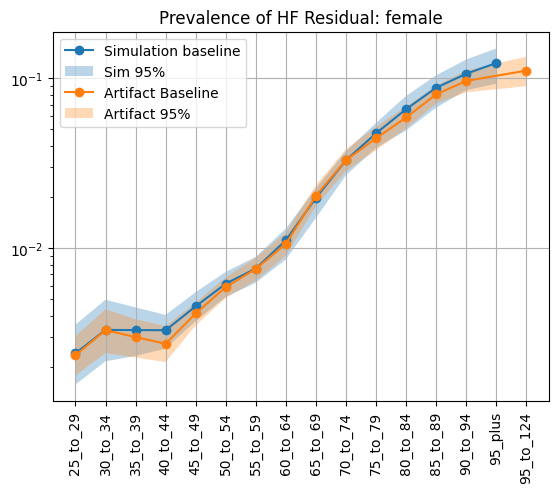

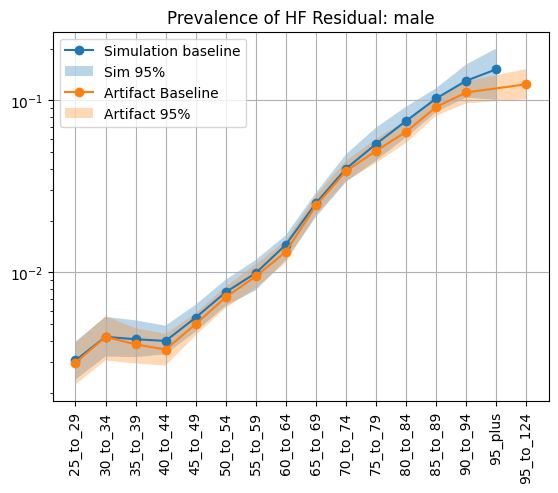

In [131]:
for sex in prev_HF_resid_allyear.sex.unique():
    plt.figure() 
    subdata = prev_HF_resid_allyear.loc[(prev_HF_resid_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_prev_hf_resid.loc[(art_prev_hf_resid.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Prevalence of HF Residual: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

## Excess Mortality Rate

#### Acute Stroke

In [132]:
art_emr = load_artifact_data('sequela', 'acute_ischemic_stroke', 'excess_mortality_rate')
art_emr['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr.age_start,art_emr.age_end)]
art_emr.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.309244,0.212204,0.442095,Alabama,excess_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.293380,0.198519,0.416337,Alabama,excess_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.323206,0.234077,0.432974,Alabama,excess_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.322984,0.238528,0.438779,Alabama,excess_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.292713,0.203912,0.393501,Alabama,excess_mortality_rate,45_to_49


In [133]:
prev_acute = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_acute_ischemic_stroke')].reset_index()
acute_rate_emr = pd.concat([acute_rate, prev_acute.ptvalue], axis=1)
acute_rate_emr['mean_rate'] = acute_rate_emr['value'] / acute_rate_emr['ptvalue']

acute_rate_sum_allyear = (acute_rate_emr
                      .groupby(['age', 'sex','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
acute_rate_sum_allyear=acute_rate_sum_allyear.loc[acute_rate_sum_allyear.scenario=='baseline']
acute_rate_sum_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.242764,0.0,2.587188
7,25_to_29,male,baseline,0.505275,0.0,4.348214
14,30_to_34,female,baseline,0.234001,0.0,3.032879
21,30_to_34,male,baseline,0.634011,0.0,6.250558
28,35_to_39,female,baseline,0.270387,0.0,3.261161


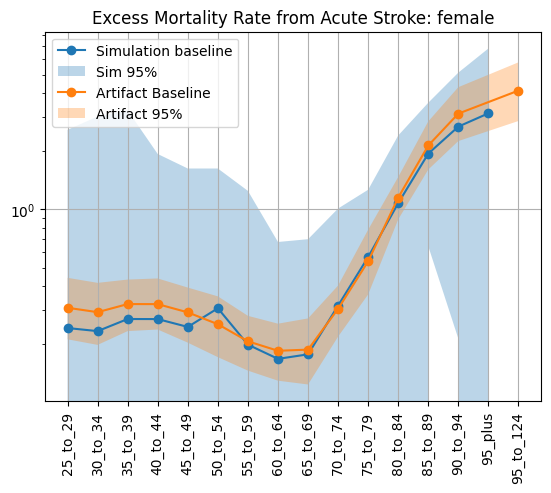

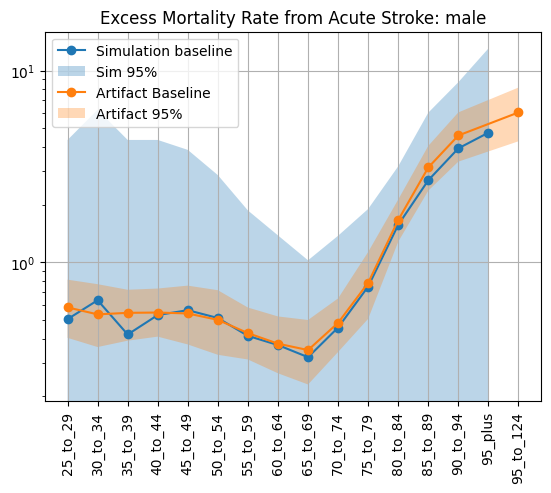

In [134]:
for sex in acute_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = acute_rate_sum_allyear.loc[(acute_rate_sum_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr.loc[(art_emr.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Chronic Stroke

In [135]:
art_emr2 = load_artifact_data('sequela', 'chronic_ischemic_stroke', 'excess_mortality_rate')
art_emr2['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr2.age_start,art_emr2.age_end)]

In [136]:
chronic = per_time_state.loc[(per_time_state['state'] == 'ischemic_stroke_chronic_ischemic_stroke')].reset_index()
#chronic = chronic.rename(columns = {'value':'ptvalue'})
chronic_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'chronic_ischemic_stroke')].reset_index()
chronic_rate_emr = pd.concat([chronic_rate, chronic.ptvalue], axis=1)
chronic_rate_emr['mean_rate'] = chronic_rate_emr['value'] / chronic_rate_emr['ptvalue']
chronic_rate_emr_allyear = (chronic_rate_emr
                      .groupby(['age', 'sex','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())

chronic_rate_emr_allyear=chronic_rate_emr_allyear.loc[chronic_rate_emr_allyear.scenario=='baseline']
chronic_rate_emr_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.000108,0.0,0.0
7,25_to_29,male,baseline,0.000000,0.0,0.0
14,30_to_34,female,baseline,0.000073,0.0,0.0
21,30_to_34,male,baseline,0.000000,0.0,0.0
28,35_to_39,female,baseline,0.000087,0.0,0.0


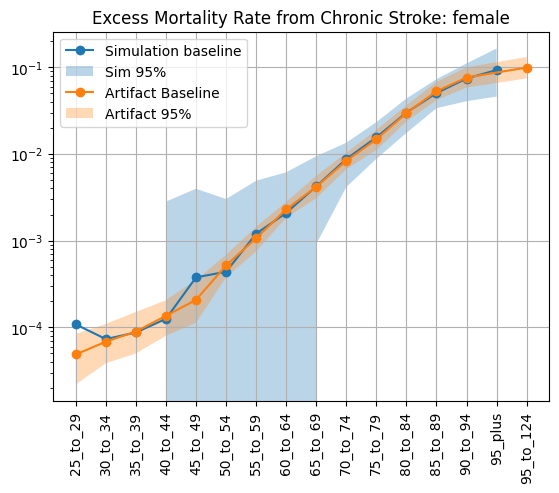

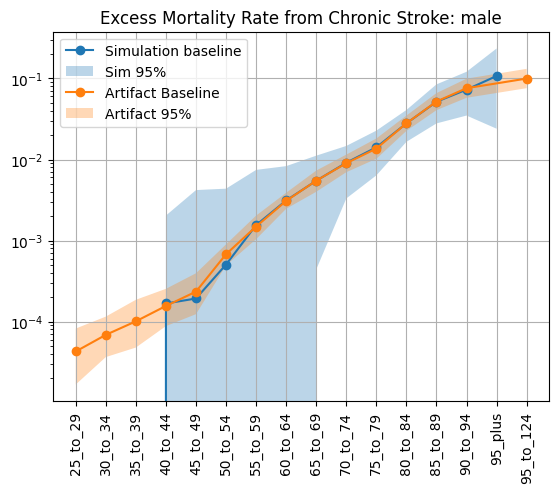

In [137]:
for sex in chronic_rate_emr_allyear.sex.unique():
    plt.figure() 
    subdata = chronic_rate_emr_allyear.loc[(chronic_rate_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr2.loc[(art_emr2.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Chronic Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Acute MI

In [119]:
art_emr_acuteMI = load_artifact_data('cause', 'acute_myocardial_infarction', 'excess_mortality_rate')
art_emr_acuteMI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_acuteMI.age_start,art_emr_acuteMI.age_end)]

In [120]:
acute_MI_EMR = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction'))].reset_index()
acute_MI_EMR = acute_MI_EMR.groupby(['age','year','sex','input_draw','scenario']).ptvalue.sum().reset_index()
acute_MI_emr_rate = death_rate_cause.loc[(death_rate_cause['cause'] == 'acute_myocardial_infarction_and_heart_failure') | (death_rate_cause['cause'] == 'acute_myocardial_infarction')].reset_index()
acute_MI_emr_rate = acute_MI_emr_rate.groupby(['age','year','sex','input_draw','scenario']).value.sum().reset_index()
acute_MI_emr_rate = acute_MI_emr_rate.merge(acute_MI_EMR[['age','year','sex','input_draw','scenario','ptvalue']], on=['age','year','sex','input_draw','scenario'])
acute_MI_emr_rate['mean_rate'] = acute_MI_emr_rate['value'] / acute_MI_emr_rate['ptvalue']
acute_MI_emr_rate_allyear = (acute_MI_emr_rate
                      .groupby(['age', 'sex', 'year','scenario'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())
acute_MI_emr_rate_allyear=acute_MI_emr_rate_allyear.loc[acute_MI_emr_rate_allyear.scenario=='baseline']
acute_MI_emr_rate_allyear.head()

,age,sex,year,scenario,mean,2.5%,97.5%
0,25_to_29,female,2023,baseline,2.997814,2.125630,4.209862
1,25_to_29,female,2024,baseline,2.985402,0.000000,9.159203
2,25_to_29,female,2025,baseline,2.867676,0.460399,5.886813
3,25_to_29,female,2026,baseline,2.810246,1.238582,6.033147
4,25_to_29,female,2027,baseline,3.346820,0.411936,5.450797


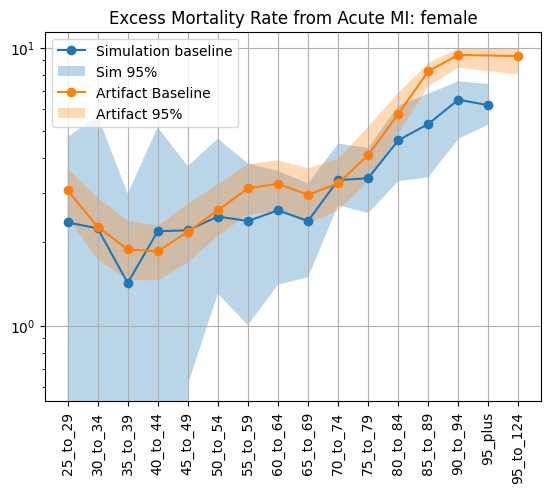

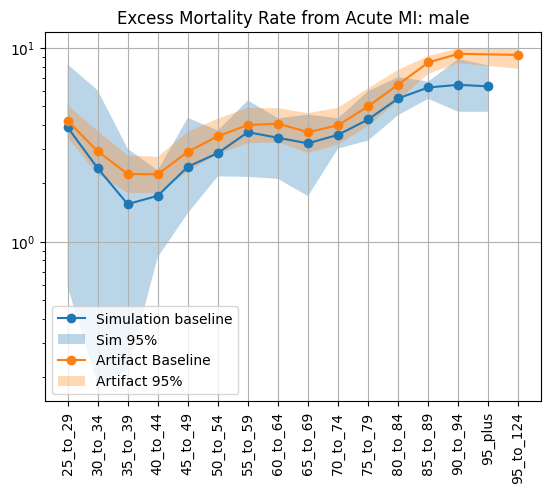

In [121]:
for sex in acute_MI_emr_rate_allyear.sex.unique():
    plt.figure() 
    subdata = acute_MI_emr_rate_allyear.loc[(acute_MI_emr_rate_allyear.sex==sex) & (acute_MI_emr_rate_allyear.year==2040)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_acuteMI.loc[(art_emr_acuteMI.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Acute MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

#### Post MI EMR

In [141]:
post_mi_rate_emr_allyear = (post_MI_emr.loc[post_MI_emr.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025, .975])
                      .filter(['mean', '2.5%', '97.5%'])
                      .reset_index())


post_mi_rate_emr_allyear.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.052619,0.0,0.182090
1,25_to_29,male,0.049934,0.0,0.162642
2,30_to_34,female,0.024869,0.0,0.058238
3,30_to_34,male,0.028010,0.0,0.072780
4,35_to_39,female,0.017177,0.0,0.046558


In [142]:
art_emr_postMI = load_artifact_data('cause', 'post_myocardial_infarction', 'excess_mortality_rate')
art_emr_postMI['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_postMI.age_start,art_emr_postMI.age_end)]

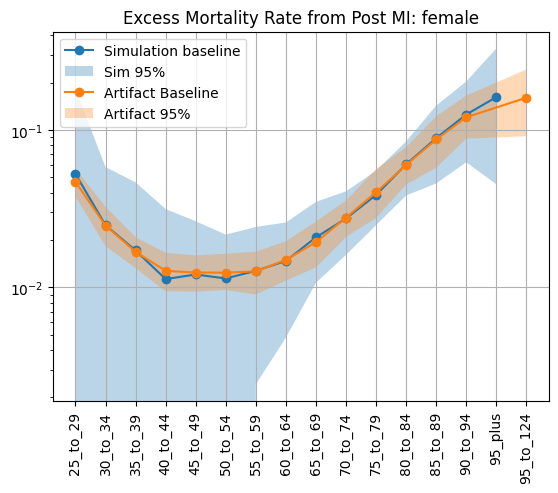

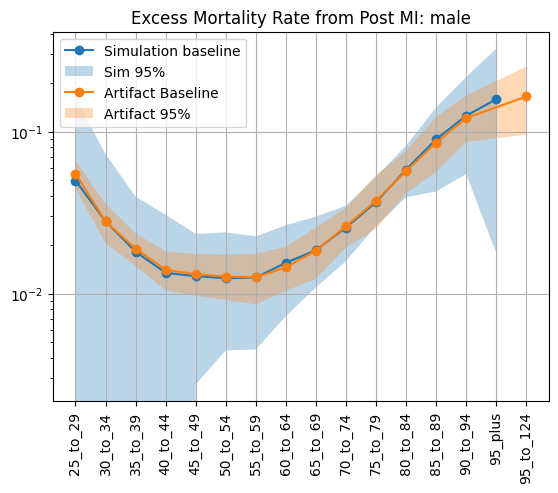

In [143]:
for sex in post_mi_rate_emr_allyear.sex.unique():
    plt.figure() 
    subdata = post_mi_rate_emr_allyear.loc[(post_mi_rate_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_postMI.loc[(art_emr_postMI.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from Post MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

### EMR for Heart Failure

In [144]:
art_emr_HF = load_artifact_data('cause', 'heart_failure', 'excess_mortality_rate')
art_emr_HF['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(art_emr_HF.age_start,art_emr_HF.age_end)]
art_emr_HF.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,location,measure,age_group
0,female,25.0,30.0,2019,2020,0.157219,0.111406,0.216535,Alabama,excess_mortality_rate,25_to_29
1,female,30.0,35.0,2019,2020,0.136440,0.095899,0.187640,Alabama,excess_mortality_rate,30_to_34
2,female,35.0,40.0,2019,2020,0.169535,0.122948,0.222670,Alabama,excess_mortality_rate,35_to_39
3,female,40.0,45.0,2019,2020,0.192198,0.141037,0.254912,Alabama,excess_mortality_rate,40_to_44
4,female,45.0,50.0,2019,2020,0.204429,0.163795,0.255060,Alabama,excess_mortality_rate,45_to_49


In [145]:
HF_emr_allyear = (HF_emr.loc[HF_emr.scenario=='baseline']
                      .groupby(['age', 'sex'])
                      .mean_rate.describe(percentiles=[.025,0.5, .975])
                      .filter(['mean','50%', '2.5%', '97.5%'])
                      .reset_index())


HF_emr_allyear.head()

,age,sex,mean,50%,2.5%,97.5%
0,25_to_29,female,inf,0.151462,0.0,6.522321
1,25_to_29,male,0.525490,0.187289,0.0,2.472223
2,30_to_34,female,0.414944,0.127413,0.0,2.302521
3,30_to_34,male,0.296335,0.136201,0.0,1.281987
4,35_to_39,female,0.388561,0.164464,0.0,1.962349


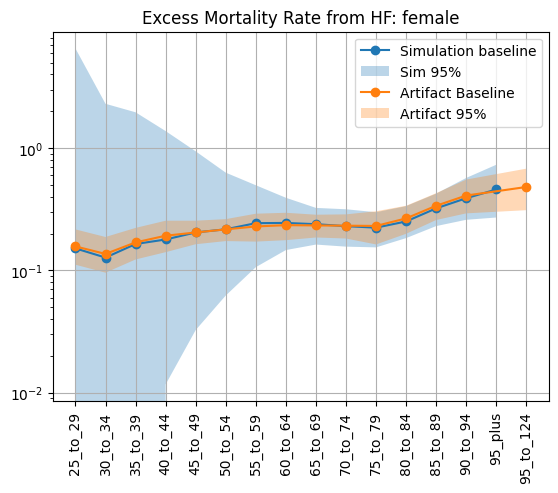

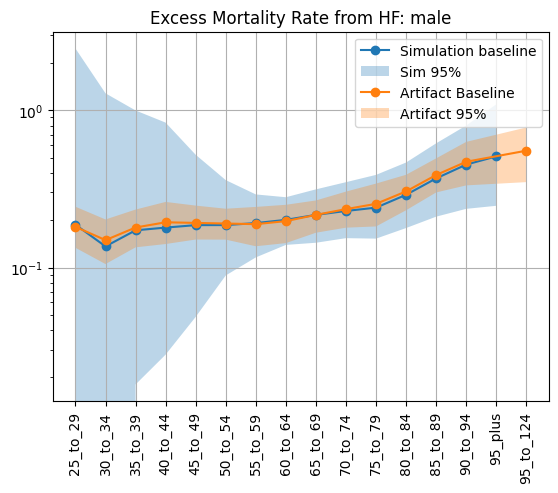

In [146]:
for sex in HF_emr_allyear.sex.unique():
    plt.figure() 
    subdata = HF_emr_allyear.loc[(HF_emr_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['50%'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = art_emr_HF.loc[(art_emr_HF.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'Excess Mortality Rate from HF: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'Artifact Baseline', 'Artifact 95%']) 

Looks a little wild in the youngest age groups but I think this is likely just due to very small sample sizes 

When I changed it to the median it matches exactly

# GBD Comparison

#### All Cause Mortality Rate

In [147]:
gbd_data = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=294, measure_id=1, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/db_queries/legacy/get_outputs_helpers/arguments.py:789: DeprecationWarning: In GBD 2022, the arguments gbd_round_id and decomp_step will be removed. Switch to using release_id exclusively. Every GBD round and decomp step combination has an equivalent release_id: https://hub.ihme.washington.edu/x/vS7NCQ
  release_helpers.validate_decomp_step_and_release_id(


In [148]:
gbd_data['age'] = gbd_data.age_group_name.str.replace(' ', '_')
gbd_data.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,location_name,location_type,measure,measure_name,metric_name,sex,val,upper,lower,age
0,10,294,523,1,3,1,2019,_all,25 to 29,All causes,...,Alabama,admin1,death,Deaths,Rate,Male,0.002153,0.002516,0.001834,25_to_29
1,10,294,523,1,3,2,2019,_all,25 to 29,All causes,...,Alabama,admin1,death,Deaths,Rate,Female,0.000950,0.001237,0.000706,25_to_29
2,11,294,523,1,3,1,2019,_all,30 to 34,All causes,...,Alabama,admin1,death,Deaths,Rate,Male,0.002456,0.002887,0.002079,30_to_34
3,11,294,523,1,3,2,2019,_all,30 to 34,All causes,...,Alabama,admin1,death,Deaths,Rate,Female,0.001364,0.001755,0.001029,30_to_34
4,12,294,523,1,3,1,2019,_all,35 to 39,All causes,...,Alabama,admin1,death,Deaths,Rate,Male,0.003056,0.003710,0.002501,35_to_39


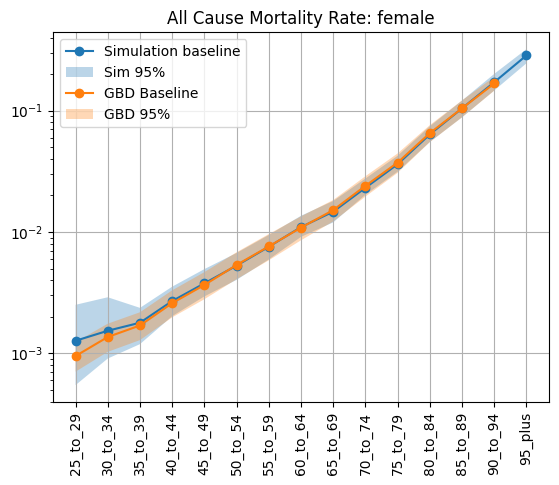

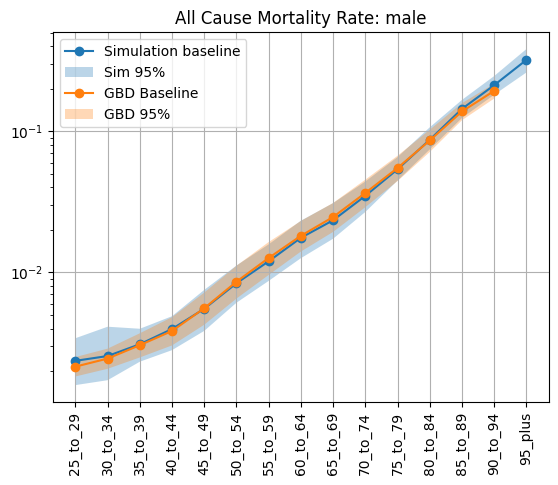

In [149]:
for sex in result_summary_allyears.sex.unique():
    plt.figure() 
    subdata = result_summary_allyears.loc[(result_summary_allyears.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_data.loc[(gbd_data.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'All Cause Mortality Rate: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence Rate for Stroke

In [150]:
gbd_incd = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=495, measure_id=6, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/db_queries/legacy/get_outputs_helpers/arguments.py:789: DeprecationWarning: In GBD 2022, the arguments gbd_round_id and decomp_step will be removed. Switch to using release_id exclusively. Every GBD round and decomp step combination has an equivalent release_id: https://hub.ihme.washington.edu/x/vS7NCQ
  release_helpers.validate_decomp_step_and_release_id(


In [151]:
gbd_incd['age'] = gbd_incd.age_group_name.str.replace(' ', '_')
gbd_incd.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,location_name,location_type,measure,measure_name,metric_name,sex,val,upper,lower,age
0,10,495,523,6,3,1,2019,cvd_stroke_isch,25 to 29,Ischemic stroke,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000068,0.000147,0.000025,25_to_29
1,10,495,523,6,3,2,2019,cvd_stroke_isch,25 to 29,Ischemic stroke,...,Alabama,admin1,incidence,Incidence,Rate,Female,0.000115,0.000224,0.000050,25_to_29
2,11,495,523,6,3,1,2019,cvd_stroke_isch,30 to 34,Ischemic stroke,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000098,0.000171,0.000052,30_to_34
3,11,495,523,6,3,2,2019,cvd_stroke_isch,30 to 34,Ischemic stroke,...,Alabama,admin1,incidence,Incidence,Rate,Female,0.000162,0.000265,0.000091,30_to_34
4,12,495,523,6,3,1,2019,cvd_stroke_isch,35 to 39,Ischemic stroke,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000145,0.000243,0.000077,35_to_39


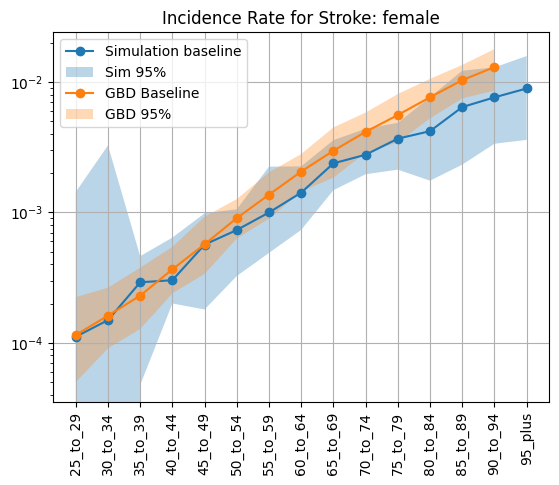

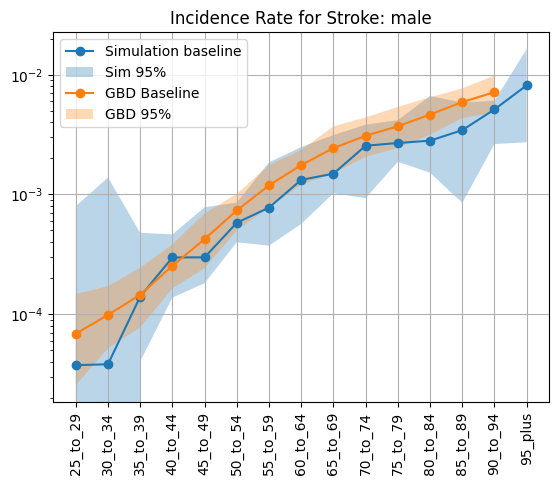

In [152]:
for sex in tran_rate_sum_allyear.sex.unique():
    plt.figure() 
    subdata = tran_rate_sum_allyear.loc[(tran_rate_sum_allyear.sex==sex) & (tran_rate_sum_allyear.year==2023)]
    plt.plot(subdata['age'], subdata['50%'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd.loc[(gbd_incd.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence Rate for Stroke: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence Rate for MI

In [153]:
gbd_incd_MI = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=493, measure_id=6, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')
gbd_incd_MI['age'] = gbd_incd_MI.age_group_name.str.replace(' ', '_')
gbd_incd_MI.head()

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/db_queries/legacy/get_outputs_helpers/arguments.py:789: DeprecationWarning: In GBD 2022, the arguments gbd_round_id and decomp_step will be removed. Switch to using release_id exclusively. Every GBD round and decomp step combination has an equivalent release_id: https://hub.ihme.washington.edu/x/vS7NCQ
  release_helpers.validate_decomp_step_and_release_id(


,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,location_name,location_type,measure,measure_name,metric_name,sex,val,upper,lower,age
0,10,493,523,6,3,1,2019,cvd_ihd,25 to 29,Ischemic heart disease,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000441,0.000626,0.000274,25_to_29
1,10,493,523,6,3,2,2019,cvd_ihd,25 to 29,Ischemic heart disease,...,Alabama,admin1,incidence,Incidence,Rate,Female,0.000452,0.000616,0.000284,25_to_29
2,11,493,523,6,3,1,2019,cvd_ihd,30 to 34,Ischemic heart disease,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000621,0.000818,0.000448,30_to_34
3,11,493,523,6,3,2,2019,cvd_ihd,30 to 34,Ischemic heart disease,...,Alabama,admin1,incidence,Incidence,Rate,Female,0.000510,0.000683,0.000345,30_to_34
4,12,493,523,6,3,1,2019,cvd_ihd,35 to 39,Ischemic heart disease,...,Alabama,admin1,incidence,Incidence,Rate,Male,0.000777,0.001081,0.000536,35_to_39


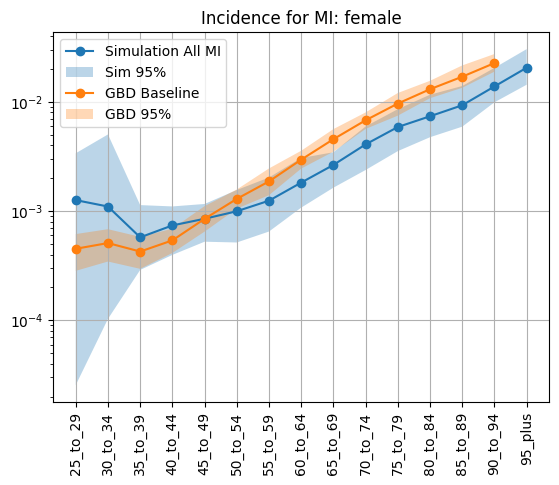

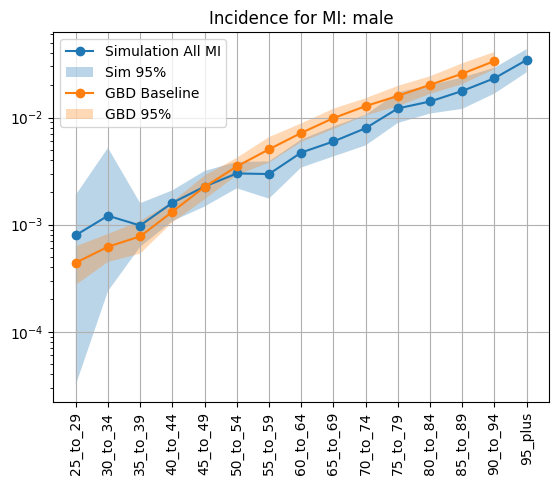

In [154]:
for sex in tran_MI_summ_allyear.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_MI_summ_allyear.loc[(tran_MI_summ_allyear.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd_MI.loc[(gbd_incd_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation All MI', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### Incidence for MI based on all person_time 

In [155]:
tran_rate_MI_GBD = tran.groupby(['age', 'sex', 'year', 'transition', 'input_draw','scenario']).value.sum().reset_index()
tran_rate_MI_GBD = tran_rate_MI_GBD.loc[(tran_rate_MI_GBD['transition'].isin(['ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease_to_acute_myocardial_infarction_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_acute_myocardial_infarction','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_acute_myocardial_infarction']))].reset_index()
tran_rate_MI_GBD = tran_rate_MI_GBD.groupby(['age', 'sex', 'year', 'input_draw','scenario']).value.sum().reset_index()
tran_rate_MI_GBD = pd.concat([tran_rate_MI_GBD, per_time_group.ptvalue], axis=1)
tran_rate_MI_GBD['rate']= tran_rate_MI_GBD['value'] / tran_rate_MI_GBD['ptvalue']
tran_rate_MI_GBD_summ = (tran_rate_MI_GBD
                 .groupby(['age', 'sex','scenario'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())

tran_rate_MI_GBD_summ=tran_rate_MI_GBD_summ.loc[tran_rate_MI_GBD_summ.scenario=='baseline']
tran_rate_MI_GBD_summ.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.001255,0.000000,0.003586
7,25_to_29,male,baseline,0.000793,0.000000,0.002166
14,30_to_34,female,baseline,0.001097,0.000040,0.006600
21,30_to_34,male,baseline,0.001205,0.000115,0.006592
28,35_to_39,female,baseline,0.000573,0.000172,0.001310


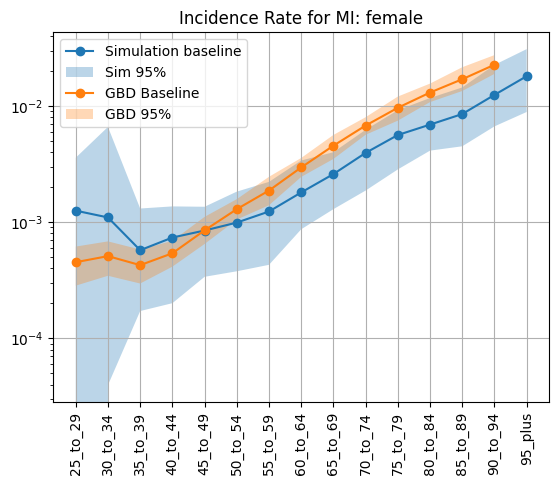

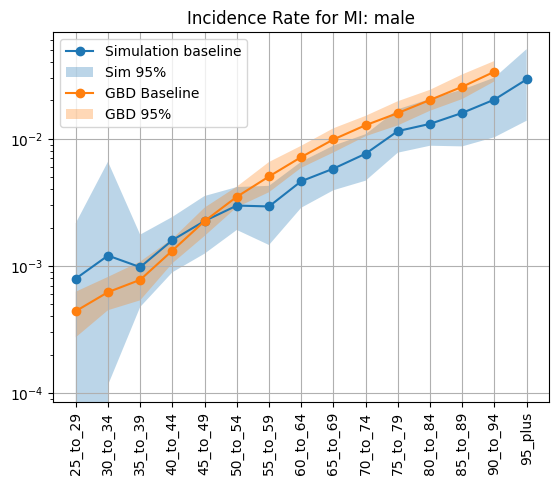

In [156]:
for sex in tran_rate_MI_GBD_summ.sex.unique():
    plt.figure() 
    subdata = tran_rate_MI_GBD_summ.loc[(tran_rate_MI_GBD_summ.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_incd_MI.loc[(gbd_incd_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'Incidence Rate for MI: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

#### DALYs from Acute MI

In [157]:
gbd_daly_MI = go("cause", gbd_round_id=6, age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32,33], cause_id=493, measure_id=2, metric_id=3, location_id=523, year_id=2019, sex_id=[1,2], decomp_step='step5')

/ihme/homes/lutzes/.conda/envs/cvd/lib/python3.8/site-packages/db_queries/legacy/get_outputs_helpers/arguments.py:789: DeprecationWarning: In GBD 2022, the arguments gbd_round_id and decomp_step will be removed. Switch to using release_id exclusively. Every GBD round and decomp step combination has an equivalent release_id: https://hub.ihme.washington.edu/x/vS7NCQ
  release_helpers.validate_decomp_step_and_release_id(


In [158]:
gbd_daly_MI['age'] = gbd_daly_MI.age_group_name.str.replace(' ', '_')
gbd_daly_MI.head()

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,...,location_name,location_type,measure,measure_name,metric_name,sex,val,upper,lower,age
0,10,493,523,2,3,1,2019,cvd_ihd,25 to 29,Ischemic heart disease,...,Alabama,admin1,daly,DALYs (Disability-Adjusted Life Years),Rate,Male,0.002084,0.002684,0.001595,25_to_29
1,10,493,523,2,3,2,2019,cvd_ihd,25 to 29,Ischemic heart disease,...,Alabama,admin1,daly,DALYs (Disability-Adjusted Life Years),Rate,Female,0.001076,0.001488,0.000753,25_to_29
2,11,493,523,2,3,1,2019,cvd_ihd,30 to 34,Ischemic heart disease,...,Alabama,admin1,daly,DALYs (Disability-Adjusted Life Years),Rate,Male,0.005151,0.006505,0.003896,30_to_34
3,11,493,523,2,3,2,2019,cvd_ihd,30 to 34,Ischemic heart disease,...,Alabama,admin1,daly,DALYs (Disability-Adjusted Life Years),Rate,Female,0.002720,0.003687,0.001977,30_to_34
4,12,493,523,2,3,1,2019,cvd_ihd,35 to 39,Ischemic heart disease,...,Alabama,admin1,daly,DALYs (Disability-Adjusted Life Years),Rate,Male,0.012157,0.015460,0.009483,35_to_39


In [159]:
yll_MI = yll.loc[yll['cause'].isin(["acute_myocardial_infarction", "post_myocardial_infarction"])].reset_index()
yll_MI = yll_MI.groupby(['age', 'sex', 'year', 'input_draw','scenario']).yll.sum().reset_index()
yld_MI = yld.loc[yld['cause_of_disability'].isin(["acute_myocardial_infarction"])].reset_index()
len(yld_MI)

37800

In [160]:
daly_MI = pd.concat([yll_MI, yld_MI.yld], axis=1)
daly_MI['daly'] = daly_MI['yll'] + daly_MI['yld']
daly_MI.head()

,age,sex,year,input_draw,scenario,yll,yld,daly
0,25_to_29,female,2023,29,baseline,62.911045,0.017486,62.928531
1,25_to_29,female,2023,29,lifestyle_100,62.911045,0.017486,62.928531
2,25_to_29,female,2023,29,lifestyle_50,62.911045,0.017486,62.928531
3,25_to_29,female,2023,29,outreach_100,62.911045,0.017486,62.928531
4,25_to_29,female,2023,29,outreach_50,62.911045,0.017486,62.928531


In [161]:
daly_MI = daly_MI.groupby(['age', 'sex', 'year', 'input_draw','scenario']).daly.sum().reset_index()
daly_MI_rate = pd.concat([daly_MI, per_time_group.ptvalue], axis=1)
daly_MI_rate['daly_rate'] = daly_MI_rate['daly'] / daly_MI_rate['ptvalue']
daly_MI_rate_allyear = (daly_MI_rate
                .groupby(['age', 'sex','scenario'])
                .daly_rate.describe(percentiles=[.025, .975])
                .filter(['mean', '2.5%', '97.5%'])
                .reset_index())
daly_MI_rate_allyear=daly_MI_rate_allyear.loc[daly_MI_rate_allyear.scenario=='baseline']
daly_MI_rate_allyear.head()

,age,sex,scenario,mean,2.5%,97.5%
0,25_to_29,female,baseline,0.028155,0.000006,0.098211
7,25_to_29,male,baseline,0.020601,0.000004,0.056525
14,30_to_34,female,baseline,0.017998,0.000016,0.077298
21,30_to_34,male,baseline,0.020622,0.002196,0.094593
28,35_to_39,female,baseline,0.010502,0.001896,0.022839


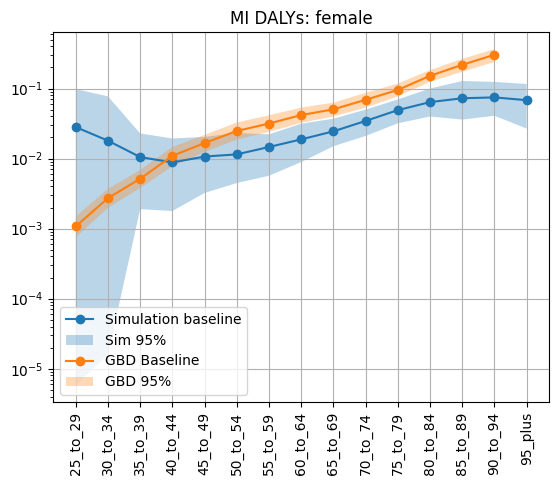

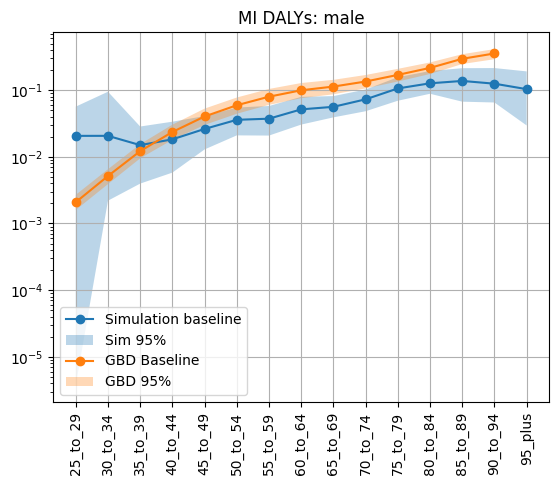

In [162]:
for sex in daly_MI_rate_allyear.sex.unique():
    plt.figure() 
    subdata = daly_MI_rate_allyear.loc[(daly_MI_rate_allyear.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_daly_MI.loc[(gbd_daly_MI.sex==sex.capitalize())]
    plt.plot(subdata2['age'], subdata2['val'], marker='o')
    plt.fill_between(subdata2['age'], subdata2['lower'], subdata2['upper'], alpha=.3)
    plt.title(f'MI DALYs: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

### Incidence of Heart Failure (need to be overall)

In [163]:
gbd_hf_inc = get_draws(release_id=6,
         year_id=2019,
         sex_id=[1,2],
         location_id=523,
         age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
         gbd_id_type='modelable_entity_id',
         gbd_id=2412,
         measure_id = 6,
         metric_id = 3,
         source='epi')

In [164]:
gbd_hf_inc_data = gbd_hf_inc.iloc[:,1:1001].apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
gbd_hf_inc = pd.concat([gbd_hf_inc, gbd_hf_inc_data], axis=1)
gbd_hf_inc['age_group'] = np.where(gbd_hf_inc['age_group_id']==10,'25_to_29',np.where(gbd_hf_inc['age_group_id']==11,'30_to_34',np.where(gbd_hf_inc['age_group_id']==12,'35_to_39',np.where(gbd_hf_inc['age_group_id']==13,'40_to_44',np.where(gbd_hf_inc['age_group_id']==14,'45_to_49',np.where(gbd_hf_inc['age_group_id']==15,'50_to_54',np.where(gbd_hf_inc['age_group_id']==16,'55_to_59',np.where(gbd_hf_inc['age_group_id']==17,'60_to_64',np.where(gbd_hf_inc['age_group_id']==18,'65_to_69',np.where(gbd_hf_inc['age_group_id']==19,'70_to_74',np.where(gbd_hf_inc['age_group_id']==20,'75_to_79',np.where(gbd_hf_inc['age_group_id']==30,'80_to_84',np.where(gbd_hf_inc['age_group_id']==31,'85_to_89',np.where(gbd_hf_inc['age_group_id']==32,'90_to_94',0))))))))))))))
gbd_hf_inc['sex'] = np.where(gbd_hf_inc['sex_id']==1,'male','female')
gbd_hf_inc

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,year_id,metric_id,model_version_id,modelable_entity_id,index,mean,2.5%,97.5%,age_group,sex
0,10,0.001049,0.000775,0.001040,0.001225,0.001013,0.001015,0.001012,0.000884,0.001013,...,2019,3,474434,2412,0,0.000981,0.000715,0.001287,25_to_29,male
1,11,0.001015,0.000842,0.001019,0.001161,0.001013,0.000969,0.001001,0.000864,0.001018,...,2019,3,474434,2412,1,0.000969,0.000734,0.001218,30_to_34,male
2,12,0.000699,0.000802,0.000751,0.000729,0.000828,0.000612,0.000769,0.000633,0.000788,...,2019,3,474434,2412,2,0.000722,0.000484,0.001018,35_to_39,male
3,13,0.001081,0.001299,0.001251,0.001069,0.001406,0.001106,0.001116,0.001221,0.001176,...,2019,3,474434,2412,3,0.001198,0.000867,0.001556,40_to_44,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,20,0.024462,0.025056,0.029839,0.033504,0.023055,0.025997,0.022266,0.027871,0.024115,...,2019,3,474434,2412,24,0.026068,0.020293,0.032827,75_to_79,female
25,30,0.044018,0.041470,0.041720,0.048295,0.040106,0.042303,0.044507,0.046475,0.039584,...,2019,3,474434,2412,25,0.043400,0.036296,0.051088,80_to_84,female
26,31,0.077213,0.068250,0.058000,0.069325,0.069019,0.068788,0.083562,0.077225,0.064731,...,2019,3,474434,2412,26,0.071791,0.056271,0.089426,85_to_89,female
27,32,0.110410,0.095030,0.074280,0.090355,0.097931,0.095273,0.122620,0.107980,0.089879,...,2019,3,474434,2412,27,0.100181,0.074706,0.129791,90_to_94,female


In [165]:
per_time_sus_HF = person_time.loc[(person_time['state'].isin(['ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction','ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure']))].reset_index()
tran_rate_HF = tran.loc[(tran['transition'].isin(['ischemic_heart_disease_and_heart_failure_acute_myocardial_infarction_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_post_myocardial_infarction_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_from_ischemic_heart_disease','ischemic_heart_disease_and_heart_failure_susceptible_to_ischemic_heart_disease_and_heart_failure_to_heart_failure_residual']))].reset_index()
groupby_cols = ['age', 'sex', 'input_draw']
tran_rate_HF = tran_rate_HF.groupby(groupby_cols).sum() / per_time_sus_HF.groupby(groupby_cols).sum()
tran_rate_HF_summ = (tran_rate_HF.groupby([c for c in groupby_cols if c != 'input_draw'])
                   .value.describe(percentiles=[0.025, 0.975])
                   .filter(['mean', '2.5%', '97.5%']))
                 
tran_rate_HF_summ.head()

mean      2.5%     97.5%
age      sex                                 
25_to_29 female  0.000695  0.000489  0.000886
         male    0.001027  0.000897  0.001165
30_to_34 female  0.000670  0.000420  0.000847
         male    0.001002  0.000786  0.001169
35_to_39 female  0.000500  0.000392  0.000606

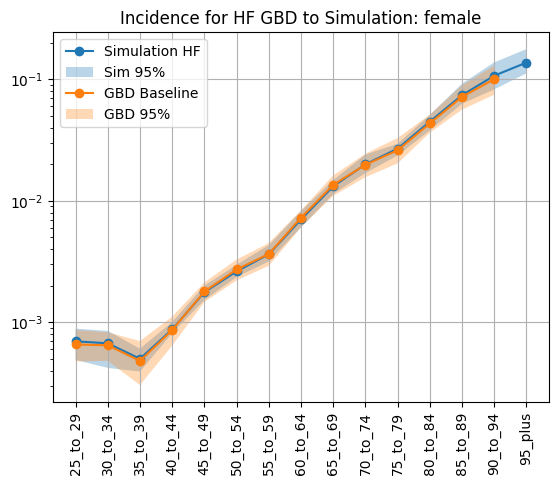

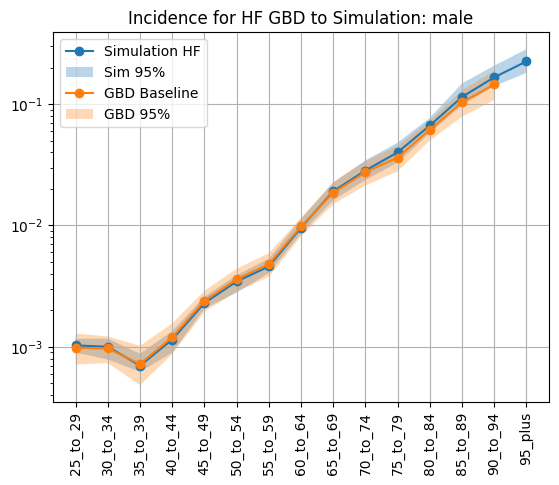

In [166]:
for sex in tran_rate_HF_summ.index.get_level_values('sex').unique():
    plt.figure() 
    subdata = tran_rate_HF_summ.loc[(tran_rate_HF_summ.index.get_level_values('sex')==sex)]
    plt.plot(subdata.index.get_level_values('age'), subdata['mean'], marker='o')
    plt.fill_between(subdata.index.get_level_values('age'), subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata3 = gbd_hf_inc.loc[(gbd_hf_inc.sex==sex)]
    plt.plot(subdata3['age_group'], subdata3['mean'], marker='o')
    plt.fill_between(subdata3['age_group'], subdata3['2.5%'], subdata3['97.5%'], alpha=.3)
    plt.title(f'Incidence for HF GBD to Simulation: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation HF', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 

### Prevalence of Heart Failure

In [167]:
gbd_hf_prev = get_draws(release_id=6,
         year_id=2019,
         sex_id=[1,2],
         location_id=523,
         age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
         gbd_id_type='modelable_entity_id',
         gbd_id=2412,
         measure_id = 5,
         metric_id = 3,
         source='epi')

In [168]:
gbd_hf_prev_data = gbd_hf_prev.iloc[:,1:1001].apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).filter(['mean', '2.5%', '97.5%']).reset_index()
gbd_hf_prev = pd.concat([gbd_hf_prev, gbd_hf_prev_data], axis=1)
gbd_hf_prev['age_group'] = np.where(gbd_hf_prev['age_group_id']==10,'25_to_29',np.where(gbd_hf_prev['age_group_id']==11,'30_to_34',np.where(gbd_hf_prev['age_group_id']==12,'35_to_39',np.where(gbd_hf_prev['age_group_id']==13,'40_to_44',np.where(gbd_hf_prev['age_group_id']==14,'45_to_49',np.where(gbd_hf_prev['age_group_id']==15,'50_to_54',np.where(gbd_hf_prev['age_group_id']==16,'55_to_59',np.where(gbd_hf_prev['age_group_id']==17,'60_to_64',np.where(gbd_hf_prev['age_group_id']==18,'65_to_69',np.where(gbd_hf_prev['age_group_id']==19,'70_to_74',np.where(gbd_hf_prev['age_group_id']==20,'75_to_79',np.where(gbd_hf_prev['age_group_id']==30,'80_to_84',np.where(gbd_hf_prev['age_group_id']==31,'85_to_89',np.where(gbd_hf_prev['age_group_id']==32,'90_to_94',0))))))))))))))
gbd_hf_prev['sex'] = np.where(gbd_hf_prev['sex_id']==1,'male','female')
gbd_hf_prev

,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,...,year_id,metric_id,model_version_id,modelable_entity_id,index,mean,2.5%,97.5%,age_group,sex
0,10,0.003778,0.003125,0.003464,0.003905,0.003189,0.003641,0.003053,0.003370,0.003728,...,2019,3,474434,2412,0,0.003425,0.002560,0.004464,25_to_29,male
1,11,0.005600,0.004624,0.004955,0.005442,0.004758,0.005798,0.004427,0.004886,0.005622,...,2019,3,474434,2412,1,0.005170,0.003765,0.006809,30_to_34,male
2,12,0.005242,0.004945,0.004916,0.005574,0.004708,0.005497,0.004972,0.004828,0.005632,...,2019,3,474434,2412,2,0.005088,0.003940,0.006325,35_to_39,male
3,13,0.004548,0.005227,0.004915,0.005677,0.004706,0.004713,0.005692,0.004802,0.005254,...,2019,3,474434,2412,3,0.004829,0.003893,0.005944,40_to_44,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,20,0.076563,0.094148,0.103080,0.090576,0.086858,0.088300,0.085748,0.090613,0.085839,...,2019,3,474434,2412,24,0.087871,0.074747,0.102750,75_to_79,female
25,30,0.106520,0.132950,0.139620,0.117470,0.125680,0.123420,0.122330,0.131890,0.121830,...,2019,3,474434,2412,25,0.122269,0.105318,0.141687,80_to_84,female
26,31,0.164710,0.183800,0.169510,0.162850,0.178220,0.165180,0.186680,0.190410,0.167490,...,2019,3,474434,2412,26,0.174401,0.153990,0.196042,85_to_89,female
27,32,0.218320,0.224470,0.188510,0.212400,0.218170,0.195060,0.237920,0.239550,0.202750,...,2019,3,474434,2412,27,0.219888,0.188509,0.253274,90_to_94,female


In [169]:
prev_HF = per_time_state.loc[(per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_from_ischemic_heart_disease') | ((per_time_state['state'] == 'ischemic_heart_disease_and_heart_failure_heart_failure_residual'))].reset_index()
prev_HF = prev_HF.rename(columns = {'ptvalue':'value'})
prev_HF = prev_HF.groupby(['age','sex','year','input_draw']).value.sum().reset_index()
prev_HF = prev_HF.merge(per_time_group[['age','sex','year','input_draw','ptvalue']], on=['age','sex','year','input_draw'])
prev_HF['rate']= prev_HF['value'] / prev_HF['ptvalue']
prev_HF_summ = (prev_HF
                 .groupby(['age', 'sex'])
                 .rate.describe(percentiles=[.025, .975])
                 .filter(['mean', '2.5%', '97.5%'])
                 .reset_index())
prev_HF_summ.head()

,age,sex,mean,2.5%,97.5%
0,25_to_29,female,0.018048,0.011289,0.025935
1,25_to_29,male,0.024367,0.019161,0.031231
2,30_to_34,female,0.025726,0.016829,0.039149
3,30_to_34,male,0.035062,0.027391,0.046961
4,35_to_39,female,0.026628,0.019133,0.036398


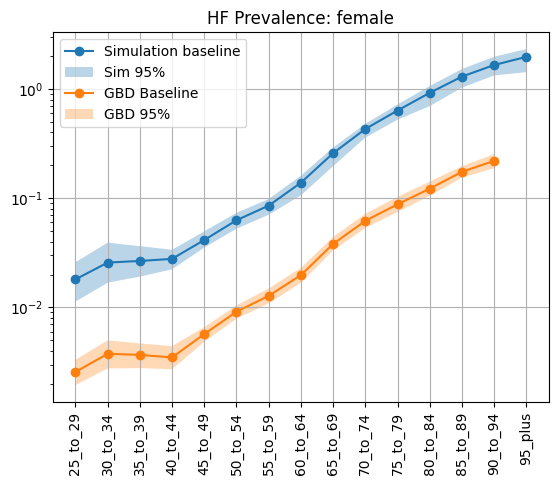

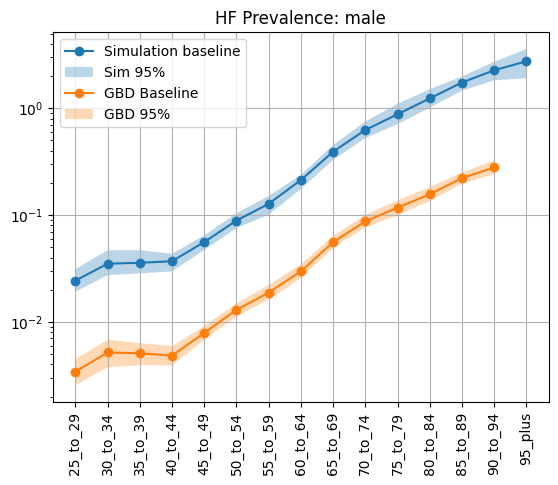

In [170]:
for sex in prev_HF_summ.sex.unique():
    plt.figure() 
    subdata = prev_HF_summ.loc[(prev_HF_summ.sex==sex)]
    plt.plot(subdata['age'], subdata['mean'], marker='o')
    plt.fill_between(subdata['age'], subdata['2.5%'], subdata['97.5%'], alpha=.3)
    subdata2 = gbd_hf_prev.loc[(gbd_hf_prev.sex==sex)]
    plt.plot(subdata2['age_group'], subdata2['mean'], marker='o')
    plt.fill_between(subdata2['age_group'], subdata2['2.5%'], subdata2['97.5%'], alpha=.3)
    plt.title(f'HF Prevalence: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.yscale('log')
    plt.legend(['Simulation baseline', 'Sim 95%', 'GBD Baseline', 'GBD 95%']) 